<a href="https://colab.research.google.com/github/IsaaHack/IA/blob/main/P2_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Automático - Práctica 2 - Experimentación con agrupamiento y detección de anomalías  no supervisada

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 19 de Mayo de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>ISAAC BRAO AISSAONI</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, tres Notebooks de Colab (uno con cada ejercicio). No es necesario entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: OPTIMIZANDO k-MEANS y DBSCAN (4 puntos)</font>

<font color='blue'>La optimización de algoritmos de clustering como k-Means y DBSCAN en aprendizaje automático es fundamental para abordar aplicaciones reales debido a varias razones críticas. Primero, estas técnicas son ampliamente aplicadas en la segmentación de clientes, detección de anomalías, sistemas de recomendación, y otras áreas donde la agrupación efectiva de datos es crucial para extraer _insights_ significativos y tomar decisiones informadas. Optimizar estos algoritmos permite manejar grandes volúmenes de datos de manera eficiente, mejorando la velocidad y reduciendo los costos computacionales, lo cual es esencial en entornos donde el tiempo y los recursos son limitados. Además, al afinar estos métodos para incrementar su precisión y sensibilidad, se pueden identificar patrones y tendencias con mayor exactitud, lo que resulta en modelos más robustos y confiables. En un mundo donde los datos crecen exponencialmente, la capacidad de procesar y analizar esta información de manera efectiva es clave para el éxito en diversas aplicaciones prácticas, haciendo de la optimización y uso (incluso como parte de estrategias complejas de entrenamiento) de algoritmos de _clustering_ un componente indispensable en el campo del _machine learning_.

<font color='blue'>En este ejercicio intentaremos profundizar un poco en cómo optimizar y operar con dos algoritmos de clustering básicos (k-Means y DBSCAN).



---




<font color='blue'>Primero, importamos las librerías necesarias y fijamos la semilla aleatoria para que nuestros resultados sean reproducibles entre ejecuciones.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Fijamos la semilla aleatoria
np.random.seed(42) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

# Cambiamos aspecto de los gráficos
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)





---






### <font color='blue'>Ejercicio 1.A: Optimizando k-Means (3 puntos)</font>

<font color='blue'> Vamos a entrenar un agrupador K-Means en un conjunto de datos sintético en 2D, y vamos a intentar encontrar el centro de cada mancha y asignar cada instancia a la mancha/agrupación más cercana. Las tareas concretas a realizar en este ejercicio se resumen a continuación:
1.   Completamos el código con el ajuste de un `KMeans` usando 5 clusters y el hiperparámetro `n_init` con un valor igual a 1. Este hiperparámetro nos dice el número de veces que se ejecuta el algoritmo k-means con diferentes semillas de centroide (inicializaciones aleatorias). El resultado final es el mejor resultado de `n_init` ejecuciones consecutivas en términos de inercia. En general, suele ser recomendable emplear varias ejecuciones (especialmente, en problemas con alta dimensionalidad).
2.   Cada instancia se asignará a uno de los cinco clusters. En el contexto del clustering, la etiqueta de una instancia es el índice del cluster al que el algoritmo asigna esta instancia; esto no debe confundirse con las etiquetas de clase en clasificación, que se utilizan como objetivos. La instancia `KMeans` conserva las etiquetas predichas de las instancias con las que se entrenó, disponibles a través de la variable de instancia `labels_`. Imprimimos los centros de los 5 clusters y dibujamos los bordes de decisión de los 5 clusters obtenidos.
3. Predecimos cuatro nuevas instancias con valores `[[0, 2], [3, 2], [-3, 3], [-3, 2.5]]` utilizando el enfoque de clustering duro (`predict`) y clustering flexible (`transform`). En el primer caso, se proporciona uno de los clusters como aquel al que pertenece la instancia bajo estudio (es decir, cada instancia se asume que pertenece a un único cluster). En el segundo, se recupera un valor de pertenencia difuso/parcial de la instancia a cada uno de los clusters (es decir, cada instancia tiene un cierto grado de pertenencia a cada uno de los clusters).
4. A continuación, vamos a ver de qué forma influye la inicialización de los centroides en el resultado final. Vamos a escoger, de forma aproximada, dónde se pueden poner los 5 centroides para comenzar a iterar con un k-means. Para ello se puede lanzar `KMeans` con el hiperparámetro `n_init=1` y el hiperparámetro `init` con un `np.array` de 5 puntos en 2D escogidos manualmente por el estudiante. Prueba qué ocurre en este caso, imprimiendo los centros y dibujando los bordes de decisión de los 5 clusters obtenidos.
5. En la mayoría de casos reales y de interés, no es viable saber dónde están los centroides, pues los datos son más complejos. Para estos casos, el hiperpárametro `n_init` tiene un valor por defecto de 10; lo que significa que todo el algoritmo se ejecuta 10 veces cuando se llama a `fit()`, y Scikit-Learn se queda con la mejor solución. Pero, ¿cómo sabe exactamente qué solución es la mejor? Utiliza una métrica de rendimiento. Esa métrica se llama inercia del modelo, que es la suma de las distancias al cuadrado entre las instancias y sus centroides más cercanos. La clase `KMeans` ejecuta el algoritmo `n_init` veces y se queda con el modelo con la inercia más baja. La inercia de un modelo es accesible a través de la variable de instancia `inertia_`. El método `score()` devuelve la inercia negativa. ¿Por qué crees que devuelve el valor negativo? Imprime los valores `inertia_` y `score()` obtenidos en el apartado anterior.
6. Prueba diferentes métodos de inicialización (hiperparámetro `init`) y diferentes variantes de k-Medias con el hiperparámetro `algorithm`. Describe cada método de inicialización y compara gráficamente el resultado. ¿Notas diferencias significativas en las figuras representadas? ¿Por qué?
7. Vamos a encontrar el número óptimo de clusters utilizando el silhouette score, que lo podéis encontrar en `sklearn.metrics` importando `silhouette_score`.  Vamos a visualizar  este score para diferente número de clusters, desde 2 hasta 15  (ambos inclusive): eje X (número de clusters) vs eje Y (silhouette score).  Aquí utilizaremos el valor `n_init=10`. Analiza los resultados obtenidos.
8. Se puede obtener una visualización aún más informativa si representamos el coeficiente
de silueta de cada instancia, ordenado por los clusters a los que está asignada y
por el valor del coeficiente. Esto se denomina diagrama de siluetas
(véase https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).
Cada diagrama contiene una forma de cuchillo por cluster. La altura de la forma indica el número
de instancias en el cluster, y su anchura representa los coeficientes de silueta
ordenados de las instancias en el cluster (más ancho es mejor). Dibuja los
coeficientes de silueta para un $k=\{3,4,5,6\}$ y analiza los resultados obtenidos.
9. El conjunto de datos clásico de Olivetti contiene 400 imágenes de rostros en escala
de grises de 64×64 píxeles. Cada imagen se aplana a un vector 1D de tamaño 4.096.
Se fotografiaron 40 personas diferentes (10 veces cada una), y la tarea habitual es
entrenar un modelo que pueda predecir qué persona está representada en cada imagen.
Carga el conjunto de datos utilizando la función `sklearn.datasets.fetch_olivetti_faces()`
y, a continuación, divídelo en un conjunto de entrenamiento y
unode test (ten en cuenta que el conjunto de datos ya está escalado entre 0 y 1).
Dado que el conjunto de datos es bastante pequeño, probablemente necesitaremos utilizar un muestreo
estratificado (`StratifiedShuffleSplit`) para asegurarnos de que hay el mismo número de imágenes por persona/clase/cluster en cada conjunto.
A continuación, agrupa las imágenes utilizando tres modelos de k-means (k-means++ con `n_init=10`,
random con `n_init=1`, y random con `n_init=10` y el algoritmo ` elkan` para agilizar cómputo), y
asegúrate de que empleamos un buen número de clústers (utilizando técnicas de los apartados anteriores).
Visualiza los clusters utilizando el mejor modelo (bajo tu criterio, que debes justificar) de los tres previos: ¿ves caras
similares en cada cluster? Es decir, ¿hemos sido capaces de agrupar rostros de las mismas personas de forma no supervisada? ¿Cómo de buenas son las predicciones realizadas con el conjunto de test: se corresponden adecuadamente con las identidades de entrenamiento?
¿Qué conclusiones extraes en base al trabajo realizado y los resultados obtenidos?
NOTA: Puedes utilizar reducción de dimensionalidad para agilizar el cómputo.

<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blobs_c = np.array([[ 0,  2.5], [-1.5 ,  2.3], [-2.8,  1.7],
                         [-2.6,  3.5], [-2.9,  1.4]])
blob_std = np.array([0.45, 0.25, 0.1, 0.1, 0.05])
X, y = make_blobs(n_samples=2000, centers=blobs_c, cluster_std=blob_std,
                  random_state=42)

<font color='blue'> Dibujamos las manchas.

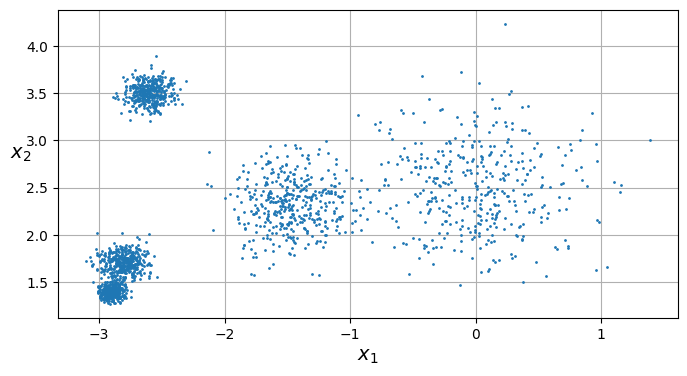

In [ ]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

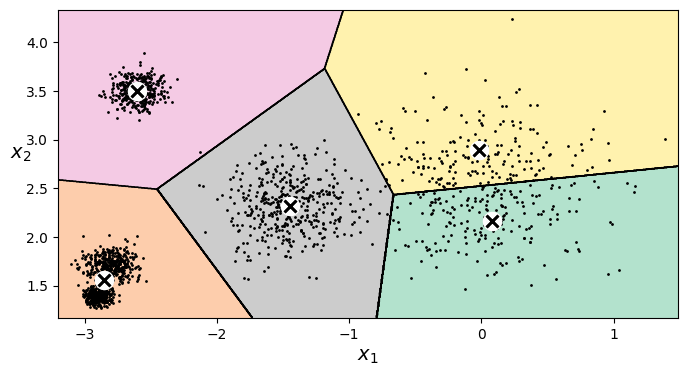

In [ ]:
# Apartado 1
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
#A CUBRIR POR EL ALUMNADO
kmeans.fit(X)


#Apartado 2
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

#A CUBRIR POR EL ALUMNADO
plt.figure(figsize=(8, 4))
plot_centroids(kmeans.cluster_centers_)
plot_decision_boundaries(kmeans, X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

Podemos observar como en esta ejecución del algoritmo k-means no realiza los clusters de manera adecuada. Los dos clusters en la región naranja no son separados, y el cluster que coresponde a las regiones amarilla y verde, es separado cosa que no debe pasar.

In [ ]:
#Apartado 3
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
#A CUBRIR POR EL ALUMNADO
y_pred_duro = kmeans.predict(X_new)
y_pred_soft = kmeans.transform(X_new)

print(f'Predicciones duras: {y_pred_duro}')
print(f'Predicciones suaves:\n{y_pred_soft}')

Predicciones duras: [0 0 2 1]
Predicciones suaves:
[[0.18223039 2.88604435 3.00245465 0.89138253 1.48240029]
 [2.92625035 5.86829444 5.79854651 3.14941474 4.45922309]
 [3.18974087 1.45428401 0.63877213 2.98127968 1.69530934]
 [3.09660472 0.95827092 1.07572208 3.00485781 1.56275789]]


Los predicciones duras corresponden al argmin de cada fila de la matriz de predicciones suaves.

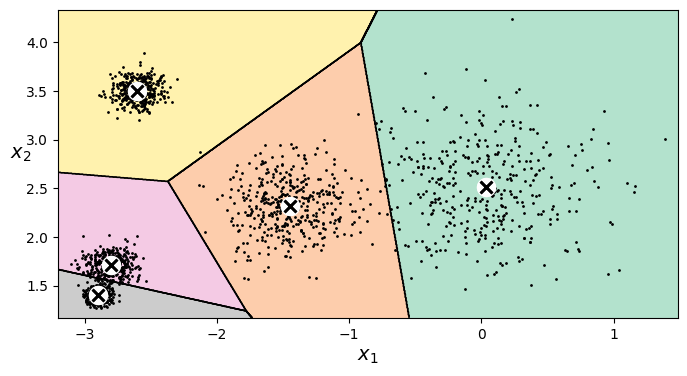

In [ ]:
#Apartado 4
good_init = np.array([[0, 2.5], [-1.5 ,  2.3], [-2.8,  1.7], [-2.6,  3.5], [-2.9,  1.4] ])
#A CUBRIR POR EL ALUMNADO
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plot_centroids(kmeans.cluster_centers_)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

Asignando previamente los centros, se saca mejor resultado. Pero esto es inviable en la mayoría de casos.

In [ ]:
#Apartado 5

print(f'Inercia: {kmeans.inertia_}')
print(f'Score: {kmeans.score(X)}')

Inercia: 212.06148433504592
Score: -212.06148433504592


Que el score sea negativo se puede deber a porque, por defecto, los scores se intentan maximizar, minimizando la inercia, que es lo que queremos en este caso.

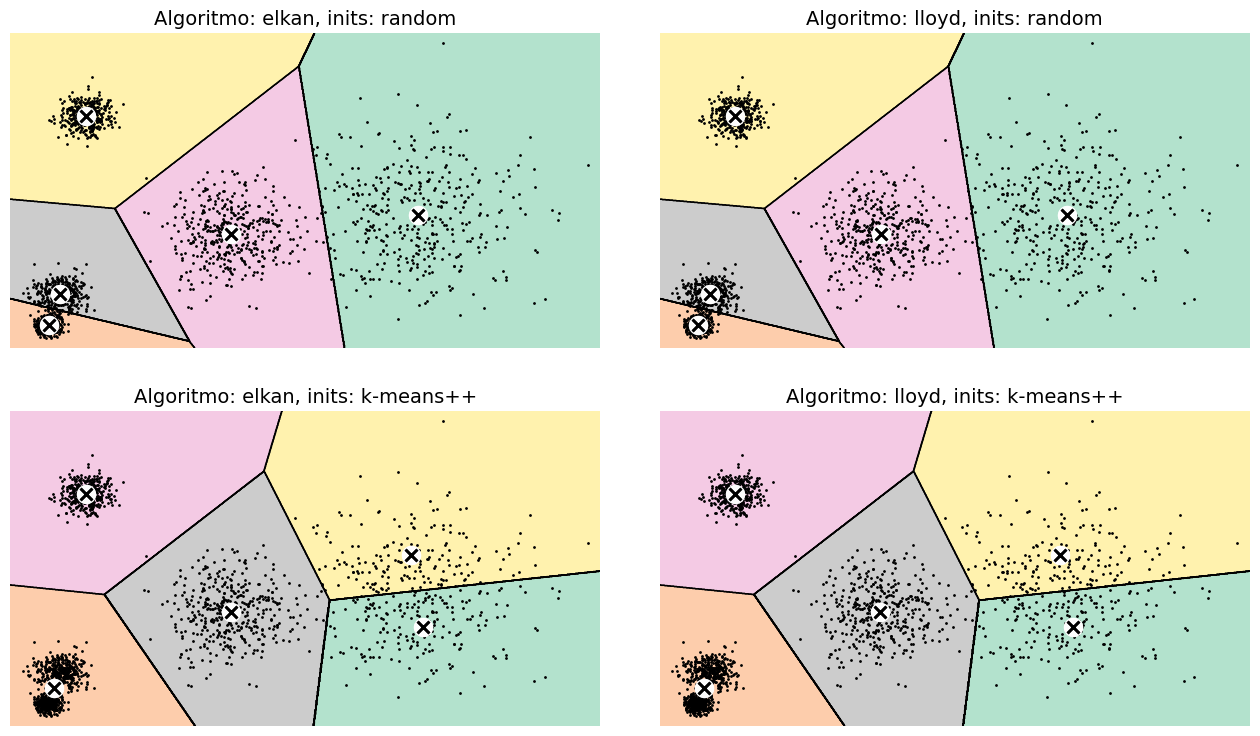

In [ ]:
#Apartado 6
kmeans_algorithms = ['elkan', 'lloyd']
inits = ['random', 'k-means++']

n_algorithms = len(kmeans_algorithms)
inits_len = len(inits)

plt.figure(figsize=(16, 9))

for alg_idx, alg in enumerate(kmeans_algorithms):
    for init_idx, init in enumerate(inits):
        plt.subplot(inits_len, n_algorithms, alg_idx + init_idx * n_algorithms + 1)
        kmeans = KMeans(n_clusters=k, n_init=1, algorithm=alg, random_state=42, init=init)
        kmeans.fit(X)
        plot_decision_boundaries(kmeans, X, show_xlabels=False, show_ylabels=False)
        plot_centroids(kmeans.cluster_centers_)
        plt.title(f'Algoritmo: {alg}, inits: {init}')
        plt.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.2)

Hay diferencias entre el init random y kmeans++. En este caso es mejor la inicialización random, pero puede ser mera casualidad y que en otro casos de peores resultados que kmeans++.

Con respecto a elkan y lloyd no hay difernecias significativas y hacen que, en general, el algoritmo se comporte de manera similar.

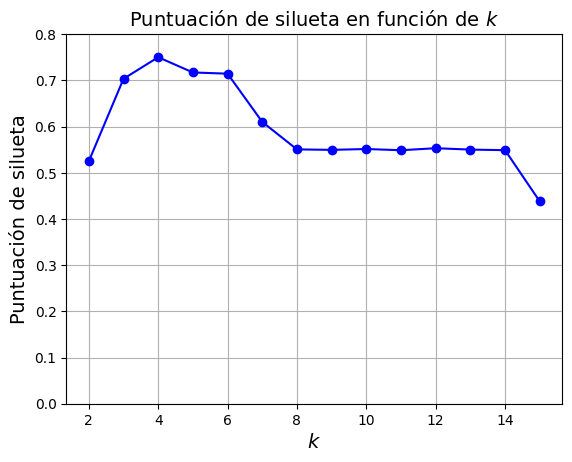

In [ ]:
#Apartado 7
from sklearn.metrics import silhouette_score

#A CUBRIR POR EL ALUMNADO

n_clusters = range(2, 16)

silhouette_scores = []

for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_init=10)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))


plt.plot(n_clusters, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Puntuación de silueta")
plt.ylim(0, max(silhouette_scores) + 0.05)
plt.title("Puntuación de silueta en función de $k$")
plt.grid(True)
plt.show()

Según el gráfico de silueta, el número óptimo de cluster es 4. Como sabemos esto no es así, es de 5. Esto se puede deber a que kmeans no encontró la manera adecuada dividir los clusters, como vimos anteriormente.

También puede ser poque no encontró diferencias significativas entre dos clusters y los consideró que eran pertenecian a un solo cluster.

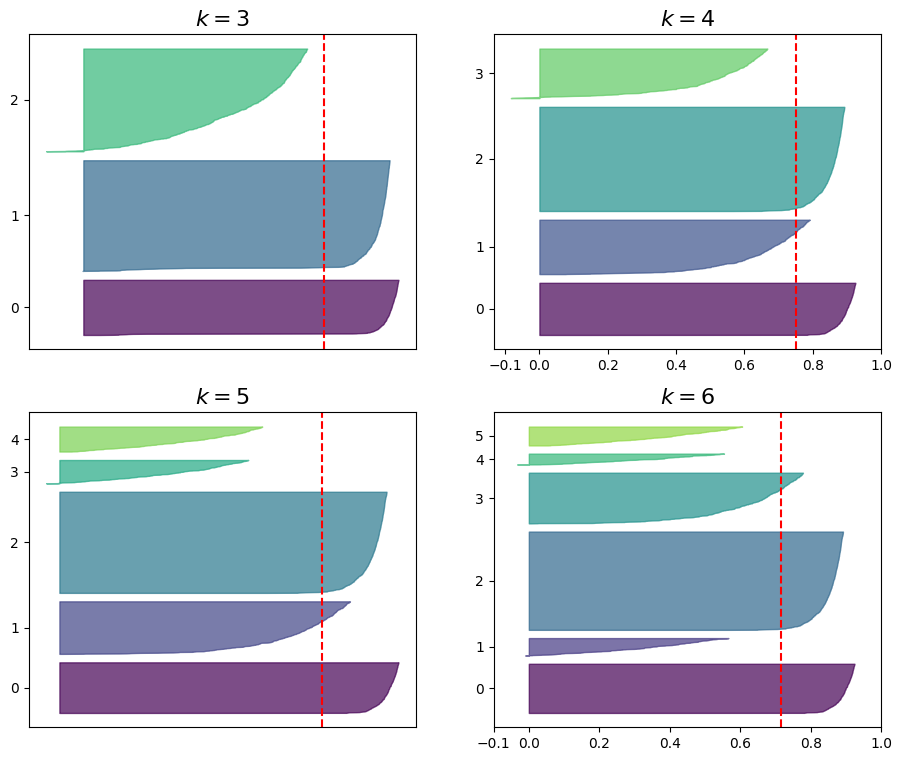

In [ ]:
#Apartado 8

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

#A CUBRIR POR EL ALUMNADO

plt.figure(figsize=(11, 9))

for i, k in enumerate((3, 4, 5, 6)):
    plt.subplot(2, 2, i + 1)

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    silhouette_coefficients = silhouette_samples(X, kmeans.labels_)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for j in range(k):
        coeffs = silhouette_coefficients[kmeans.labels_ == j]
        coeffs.sort()

        color = plt.cm.viridis(j / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                        facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if i in (1, 3):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    else:
        plt.gca().set_xticks([])
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=16)

**Análisis de los Diagramas de Silueta**

Para \( k = 3 \)
- Los tres clusters tienen diferentes anchos, indicando que varían en tamaño.
- El coeficiente de silueta promedio parece estar alrededor de 0.4 - 0.6, con la mayoría de las instancias teniendo valores positivos.
- Un cluster muestra una forma más curva, lo que sugiere mayor homogeneidad interna.

Para \( k = 4 \)
- La distribución del tamaño de los clusters es desigual.
- El coeficiente de silueta promedio parece estar en un rango similar al de \( k = 3 \), con algunas instancias teniendo coeficientes de silueta más altos.
- El cuarto cluster muestra una variabilidad significativa en los coeficientes de silueta.

Para \( k = 5 \)
- Los clusters están distribuidos de manera más equilibrada en términos de tamaño.
- Hay un ligero aumento en el coeficiente de silueta promedio, lo que podría sugerir una mejor separación entre clusters.
- La forma de los clusters es más consistente, con menos variabilidad interna.

Para \( k = 6 \)
- La cantidad de clusters aumenta, y la distribución del tamaño se vuelve más uniforme.
- El coeficiente de silueta promedio parece ser consistente con \( k = 5 \).
- La forma de los clusters sigue siendo uniforme, lo que indica que las instancias dentro de cada cluster están bien agrupadas.

**Conclusión**
- **Homogeneidad interna**: A medida que aumenta \( k \), la homogeneidad interna de los clusters mejora, lo que se refleja en las formas más uniformes de los diagramas de silueta.
- **Separación entre clusters**: El coeficiente de silueta promedio se mantiene en rangos similares entre \( k = 3 \) y \( k = 6 \), con una ligera mejora conforme aumenta \( k \). Sin embargo, no hay un incremento significativo que justifique la elección de un valor de \( k \) mucho mayor.
- **Balance de tamaños de clusters**: A medida que \( k \) aumenta, la distribución del tamaño de los clusters se vuelve más equilibrada.

En general, parece que tanto \( k = 5 \) como \( k = 6 \) ofrecen una buena separación y homogeneidad de los clusters.


In [ ]:
#Apartado 9

from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

from sklearn.model_selection import StratifiedShuffleSplit

#A CUBRIR POR EL ALUMNADO

# Dividimos el conjunto de datos en entrenamiento y test, manteniendo la proporción de clases
# En el conjunto de test se incluirá el 10% de las imágenes
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, test_index in split.split(olivetti.data, olivetti.target):
    X_train = olivetti.data[train_index]
    y_train = olivetti.target[train_index]
    X_test = olivetti.data[test_index]
    y_test = olivetti.target[test_index]

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

#A CUBRIR POR EL ALUMNADO

print(f'Número de caras de entrenamiento: {len(X_train)}')
print(f'Número de caras de test: {len(X_test)}')
print(y_train)

Número de caras de entrenamiento: 360
Número de caras de test: 40
[23 33 10 36 25  6  6 28  9 26  6 27 21  8 26 30 33 34 10 34 21 24 31 16
 18 13  7 29 30 27 26  9 35  1 12 31  7 11 11  8 15  1 35 28 38 28  3  7
 20 39 29 25 33 39 33 28  0 23 14  4  8 20 14 34 36 18  8 26 22 13 22 32
  6 39  3  7 17 23  4  7 10 27 36 14  4 39 20 31  7  2  5 17 34  4 16 21
  0 25 22 23 18 15 37 18 34  9 19 31 24  1 38 18  4 32 12 25  6 23 16 32
 15 25 13 14  2 38 33 23 29 12  9  5 22  3  0 27 24  2 26 12 22  6 32 39
  3 20 22 24 34 12 38 38 36 30 23 34 38 22 28 23  2 30 17  8 36 29 14 11
 12 17 19 27 27  0  9  8  3 14 39 38 28 15 26  4  4  8 18 31  7  7  1 37
 18 27 28 37 24 30 18 19 15 16  9 17 37  0  8  2  1  0 32 29 29 33 30 15
 32  3 25 26  1  2 32 24  3 11 35  9 35 37 24 35 22 21 35 10 31 37 39 22
  3 20  9 32 19 37 17  8 21 35 10  2  7 37 21 25 20 26  9  5 13 13 10 26
  0 13 30 14 36 12 25 32 34 13 16 16 39 11 13 29 15  5 29 21 11  0 11  6
  5 34 11 36 30 35 19 36 16 13 21  6 20 16  5 23 36 10 15 

In [ ]:
modelo1 = KMeans(n_clusters=40, init='k-means++', n_init=10, random_state=42, algorithm='elkan')
modelo2 = KMeans(n_clusters=40, init='random', n_init=1, random_state=42, algorithm='elkan')
modelo3 = KMeans(n_clusters=40, init='random', n_init=10, random_state=42, algorithm='elkan')

modelos = [modelo1, modelo2, modelo3]

# PCA para visualizar los resultados
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

mejor_modelo = None

for modelo in modelos:
    modelo.fit(X_train)
    y_pred = modelo.predict(X_train)
    print(f'Modelo: {modelo}')
    print(f'Homogeneidad: {homogeneity_score(y_train, y_pred)}')
    print(f'Completitud: {completeness_score(y_train, y_pred)}')
    print(f'Inercia', modelo.inertia_)
    print(f'V-measure: {v_measure_score(y_train, y_pred)}')
    print('')
    if mejor_modelo is None or modelo.inertia_ < mejor_modelo.inertia_:
        mejor_modelo = modelo

print(f'Mejor modelo: {mejor_modelo}')

Modelo: KMeans(algorithm='elkan', n_clusters=40, n_init=10, random_state=42)
Homogeneidad: 0.7544088588809207
Completitud: 0.7859904971409967
Inercia 10709.552734375
V-measure: 0.7698759308374445

Modelo: KMeans(algorithm='elkan', init='random', n_clusters=40, n_init=1,
       random_state=42)
Homogeneidad: 0.7158364020464445
Completitud: 0.7755019173664283
Inercia 11631.3974609375
V-measure: 0.7444756097010289

Modelo: KMeans(algorithm='elkan', init='random', n_clusters=40, n_init=10,
       random_state=42)
Homogeneidad: 0.712591620909979
Completitud: 0.7761321153957365
Inercia 11330.0966796875
V-measure: 0.7430058763254171

Mejor modelo: KMeans(algorithm='elkan', n_clusters=40, n_init=10, random_state=42)


**Análisis Comparativo**

- **Homogeneidad**: El Modelo 1 tiene la homogeneidad más alta (0.7544), lo que indica que los clusters son más puros respecto a una sola clase.
- **Completitud**: El Modelo 1 también tiene la completitud más alta (0.7860), lo que indica que todos los datos de una clase están asignados al mismo cluster de forma más completa.
- **Inercia**: El Modelo 1 tiene la inercia más baja (10709.55), lo que indica que la suma de las distancias cuadradas de las instancias a sus centros de cluster es menor, sugiriendo clusters más compactos.
- **V-measure**: El Modelo 1 tiene la V-measure más alta (0.7699), que es una medida combinada de homogeneidad y completitud.

**Conclusión**

El **Modelo 1** (`KMeans(algorithm='elkan', n_clusters=40, n_init=10, random_state=42)`) es el mejor modelo basado en las métricas. Tiene los valores más altos de homogeneidad, completitud y V-measure, y la inercia más baja, lo que indica que sus clusters son más compactos y bien definidos en comparación con los otros modelos.

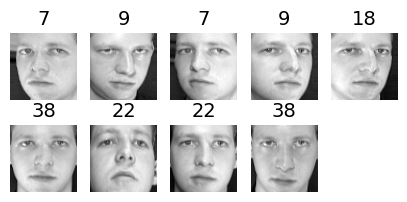

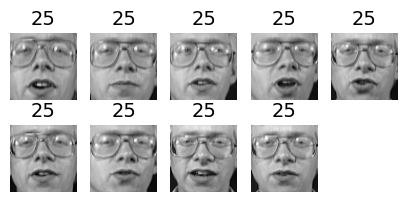

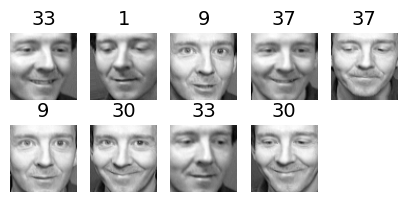

In [ ]:
# Visualizar los clusters con el mejor modelo
mejor_modelo.fit(X_train)

persona0 = X_train[y_train == 0]
persona1 = X_train[y_train == 1]
persona2 = X_train[y_train == 2]

plot_faces(persona0, mejor_modelo.predict(persona0))
plot_faces(persona1, mejor_modelo.predict(persona1))
plot_faces(persona2, mejor_modelo.predict(persona2))

Se puede observar como no clasificia muy bien, ya que para la persona 0 se le asigna a distintos clusters. Pior el contrario si clasifica bien para la persona 1. Creo que es devido a que las fotos son muy parecidas entre sí.

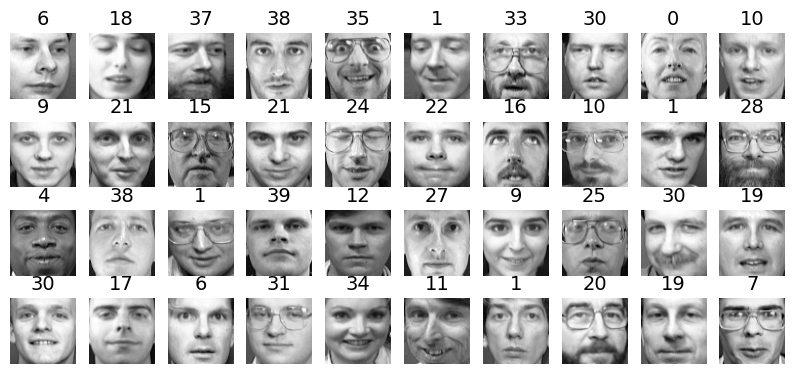

In [ ]:
# Ver el conjunto de test

y_pred_test = mejor_modelo.predict(X_test)

plot_faces(X_test, y_pred_test , n_cols=10)

En test se ve que no asigna bien a los clusters.

Se puede observar que en el cluster 1 asigna a personas con muy diferentes caras.

**Observaciones**

1. **Asignación Inadecuada de Clusters**:
   - El modelo no asigna de manera adecuada las imágenes a los clusters. Esto se puede observar por la falta de coherencia visual entre las imágenes que pertenecen al mismo cluster.
   - En varios clusters, hay una mezcla de caras con características faciales claramente diferentes, lo que sugiere que el modelo no ha podido capturar bien las diferencias relevantes.

2. **Diversidad en Clusters**:
   - La diversidad dentro de algunos clusters es alta, con imágenes que parecen tener poco en común entre sí. Esto indica que el modelo podría estar utilizando características no relevantes o que las características seleccionadas no son suficientes para una buena separación.

**Conclusión**

El modelo de clasificación no supervisada, basado en KMeans, no está asignando adecuadamente las imágenes a los clusters. La falta de coherencia visual dentro de los clusters sugiere que el modelo no ha aprendido a distinguir correctamente las características relevantes de las imágenes.

### <font color='blue'>Ejercicio 1.B: Utilización de DBSCAN (1 punto)</font>

<font color='blue'> En este ejercicio haremos algo similar a lo realizado en el anterior, pero ahora con otro problema sintético en 2D y el algoritmo DBSCAN. Para crear el conjunto sintético haremos uso de la función `make_moons` dentro del paquete de `sklearn.datasets`. Crearemos un conjunto sintético de $1.000$ puntos con una tasa de ruido de $0.05$.


<font color='blue'> Las tareas a realizar a realizar en este ejercicio se resumen a continuación:
1. A partir del conjunto de datos especificado, ajusta un algoritmo DBSCAN con los hiperparámetros por defecto (5 mínimas muestras por cluster). Identifica los índices de los ejemplos núcleo (_core points_)) e imprime sus coordenadas. Para ello, emplea las variables de instancia `core_sample_indices_` y `components_`, respectivamente.
2. La variable de instancia `labels_` contiene el núcleo al que pertenece cada ejemplo
del conjunto de datos. Observa que algunas instancias tienen un índice de cluster
igual a -1, lo que significa que el algoritmo las considera anomalías. En un conjunto
sencillo como este, en un principio, no debería haber anomalías. El hiperparámetro `eps` indica la distancia
máxima entre dos muestras para que una se considere vecina de la otra (no se trata de un
límite máximo de las distancias de los puntos dentro de un cluster). Es el hiperparámetro
de DBSCAN más importante que debes elegir adecuadamente para tu conjunto de datos y
función de distancia. Ajusta 4 modelos de DBSCAN con el hiperparámetro $eps$ igual a
$\{0.01,0.02,0.05,0.1\}$. Dibuja una representación de los clústers para cada modelo
identificando las anomalías que tiene en el gráfico y dando el porcentaje de anomalías
de cada modelo. Analiza y explica los resultados obtenidos.
3. Sorprendentemente, la clase DBSCAN no tiene un método `predict()`,
aunque sí tiene un método `fit_predict()`. En otras palabras, no puede predecir
a qué cluster pertenece una nueva instancia. Esta decisión se tomó porque diferentes
algoritmos de clasificación pueden ser mejores para diferentes tareas, por lo que los
autores decidieron dejar que el usuario eligiera cuál utilizar. Pero sí se puede usar
un clasificador para ver en qué cluster está cada punto nuevo. Hazlo con un clasificador
kNN con un vecindario de 30 vecinos, usando el mejor modelo del apartado anterior y utilizando como
ejemplos de entrenamiento los _core points_ encontrados y como etiquetas (salidas deseadas) las `labels_` obtenidas. Obtén el cluster asociado y la probabilidad para los
siguientes 4 ejemplos `[[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]]`.
Junto con lo anterior, dibuja un gráfico que represente los bordes de decisión y aplica también k-means sobre los mismo datos. Analiza las diferencias entre dichas fronteras de decisión en base al funcionamiento y naturaleza de los dos algoritmos subyacentes.
    
<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas.



---



Coordenadas de los ejemplos núcleo:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

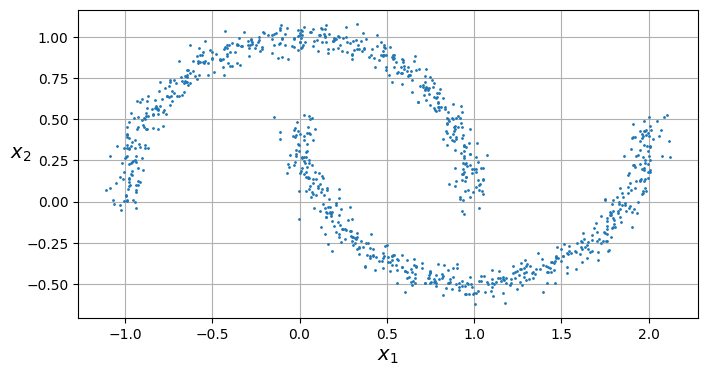

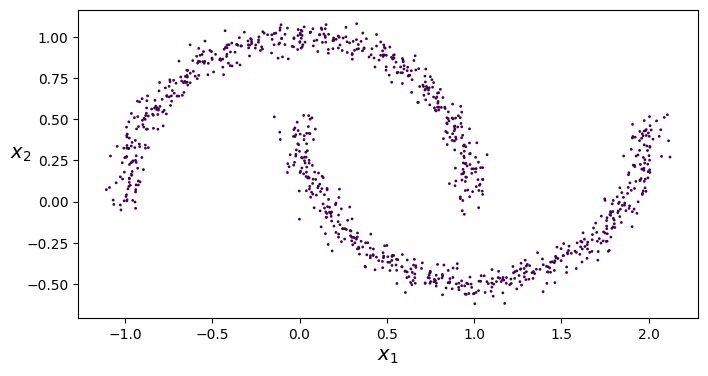

In [ ]:
#Apartado 1
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

#A CUBRIR POR EL ALUMNADO

dbscan = DBSCAN()
dbscan.fit(X)

print("Coordenadas de los ejemplos núcleo:")
print(dbscan.core_sample_indices_)

print("Coordenadas de los ejemplos núcleo:")
print(dbscan.components_)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

plt.figure(figsize=(8, 4))
plot_clusters(X, dbscan.labels_)

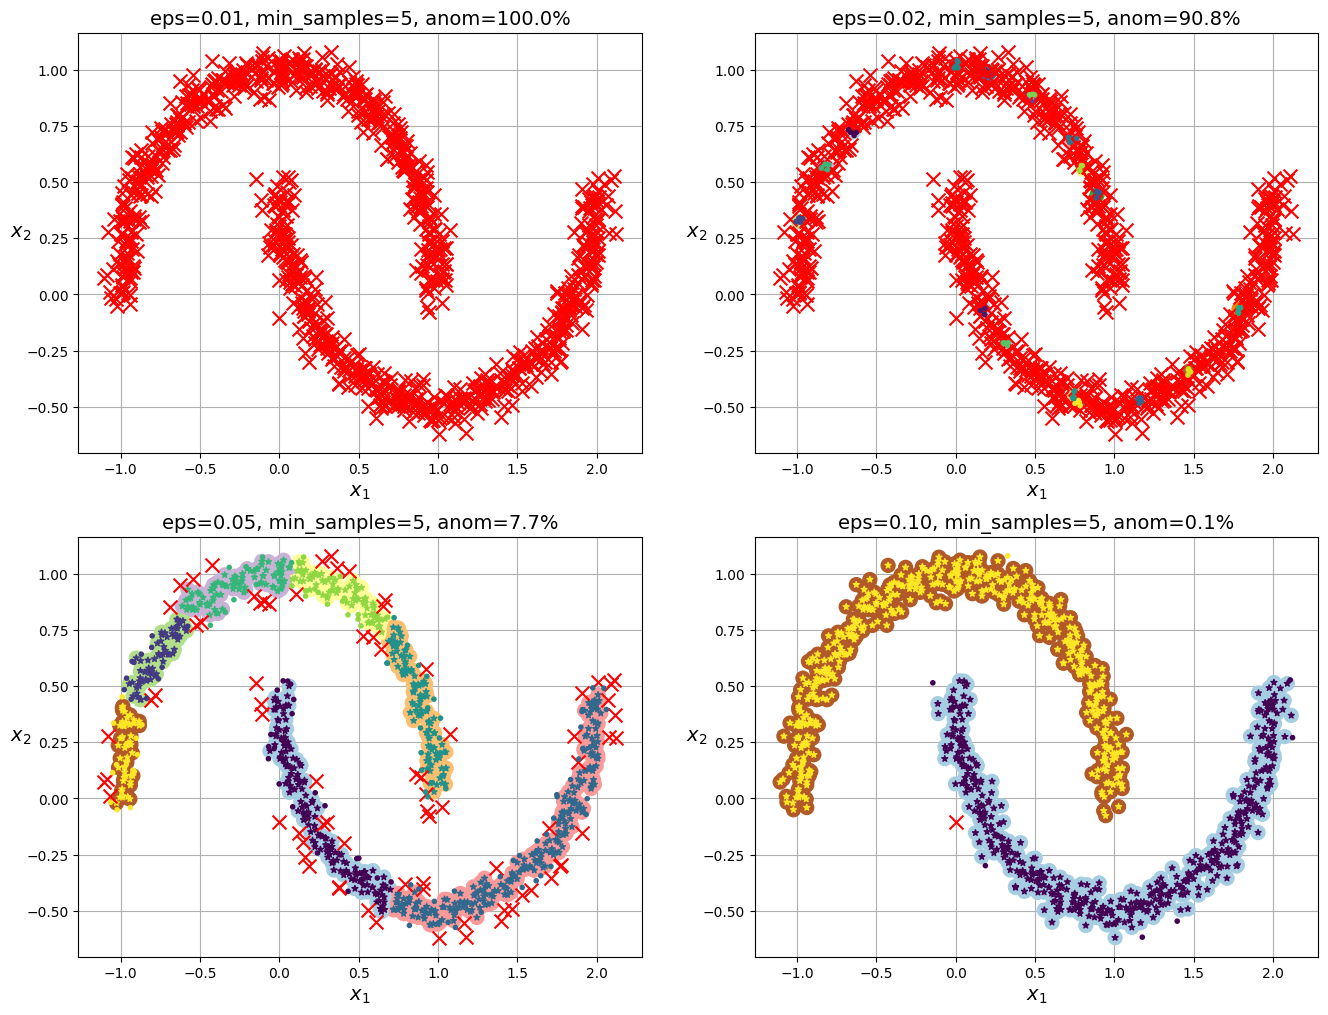

In [ ]:
#Apartado 2
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True, anom_rate = 0):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}, anom={anom_rate}%")
    plt.grid()
    plt.gca().set_axisbelow(True)

#A CUBRIR POR EL ALUMNADO

epsilons = [0.01, 0.02, 0.05, 0.1]

plt.figure(figsize=(16, 12))

for i, eps in enumerate(epsilons):
    plt.subplot(2, 2, i + 1)
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(X)
    # Calculamos el porcentaje de anomalías
    anomalias = np.sum(dbscan.labels_ == -1) / len(X) * 100

    plot_dbscan(dbscan, X, size=100, anom_rate=anomalias)


Con la observación de las 4 gráficas se ve como el valor de epsilon es super importante en DBSCAN, pasando de no tener clusters ha tener 2 clusters bien diferenciados.

Como epsilon es la distancia maxima que tiene un punto con un core_point, si eps es bajo, no habrá clusters, pero si es muy alto, todos pertenecen al mismo cluster.

Por ello, el valor más adecuado para epsilon, de todos los probados, es de 0.1.

In [ ]:
#Apartado 3
from sklearn.neighbors import KNeighborsClassifier

#A CUBRIR POR EL ALUMNADO

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

X_pred = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

y_pred = knn.predict(X_pred)
y_pred_proba = knn.predict_proba(X_pred)

print(f'Predicciones: {y_pred}')
print(f'Probabilidades:')
print(y_pred_proba)

Predicciones: [1 0 1 0]
Probabilidades:
[[0.1 0.9]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]]


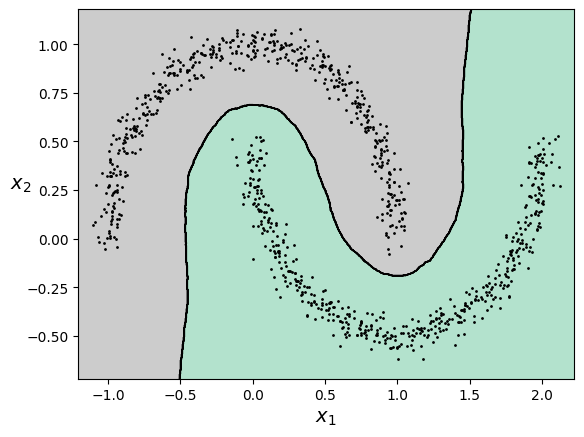

In [ ]:
plot_decision_boundaries(knn, X, show_centroids=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


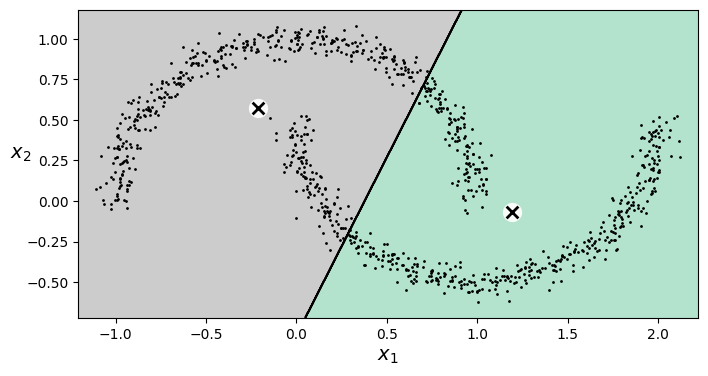

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(X)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

Kmeans no clusteriza de manera adecuada clusters que no son de forma circular, por lo que kmeans en este caso lo hace muy mal.

DBSCAN es ideal en estos casos, el decisión boundary es el adecuado y el que se espera debido a que el algoritmo se adecua mejor cuando los datos del cluster estan dispersos de manera homogenea, cosa que en este dataset pasa.

## <font color='blue'>Ejercicio 2: PROBLEMA DE AGRUPAMIENTO (5 puntos)</font>

<font color='blue'> Para la realización de este ejercicio, se ha seleccionado el dataset denominado "Anuran Calls (MFCCs)" [1] (https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs). Este conjunto de datos describe las características sonoras de los cantos de diferentes especies de anfibios del orden Anura, cuyos integrantes coloquialmente son conocidos como ranas o sapos.

<font color='blue'> Se encuentran representados por medio de los coeficientes cepstrales en las frecuencias de Mel ([_Mel-frequency cepstral coefficients_](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum), MFCCs), que son en esencia, una representación abstracta de una señal de audio obtenida al aplicar una transformada del coseno discreta a un espectrograma de Mel, es decir, una representación  de las frecuencias auditivas que son capaces de captar los humanos. Debido a ser una representación compacta del [espectrograma](https://en.wikipedia.org/wiki/Spectrogram), manteniendo las características más importantes del audio, se utiliza de forma regular en procesado del habla y aplicaciones de aprendizaje automático en procesado de señales de audio [2].

<font color='blue'> El dataset, creado por investigadores de la Universidad Federal del Amazonas en Brasil, contiene individuos de 10 especies, también incluyéndose su género y familia taxonómica, con el objetivo original de lograr realizar una clasificación multiclase de las especies de anuros que fueron grabados en los terrenos de la Universidad, así como de Mata atlántica (Brasil) y Córdoba (Argentina) en condiciones reales, es decir, con ruido de fondo.
    
<font color='blue'> Este conjunto de datos se utilizó en varias tareas de clasificación relacionadas con el reto del reconocimiento de especies de anuros a través de sus llamadas. Se trata de un conjunto de datos multietiqueta con tres columnas de etiquetas. Este conjunto de datos se creó segmentando 60 registros de audio pertenecientes a 4 familias diferentes, 8 géneros y 10 especies. Cada audio corresponde a un espécimen (una rana individual), el ID del registro también se incluye como columna adicional. Se utilizaron la entropía espectral y un método de cluster binario para detectar los fragmentos de audio pertenecientes a cada sonido. La segmentación y la extracción de características se realizaron en Matlab. Tras la segmentación se obtuvieron 7195 sílabas, que se convirtieron en instancias para entrenar y probar el clasificador.

<font color='blue'> Resulta entonces interesante saber si las clasificaciones taxonómicas realizadas tienen sentido en cuanto a los datos, es decir, ¿realmente se corresponden de cierta forma los distintos cantos de los anuros con la clasificación que poseen actualmente? ¿O existen especies que, siendo de diferentes grupos taxonómicos, poseen un canto indistinguible?

### <font color='blue'> Objetivos
    
<font color='blue'> El objetivo del presente trabajo es analizar los patrones de los datos, sin tomar en cuenta su _ground truth_, para determinar si la clasificación taxonómica actual corresponde razonablemente con una diferencia en los cantos. Claro está que este estudio representará un análisis superficial del problema, pero al menos sí podrá servir de base para estudiar si podemos determinar una taxonomía aproximada de los anuros.

<font color='blue'> Para llevar a cabo este objetivo principal se llevarán a cabo los siguientes objetivos secundarios:
1. <font color='blue'> Realización de un análisis exploratorio de los datos para una primera observación de las distribuciones de los cantos.
2. Detección y eliminación de _outliers_ así como las transformaciones necesarias para que los datos sean lo más "correctos" para los métodos de _clustering_.
4. Experimentación y determinación de los algoritmos y métricas intrínsecas más acordes a los datos. El alumnado debe experimentar con, al menos, dos algoritmos diferentes de _clustering_.

### <font color='blue'> Hipótesis
<font color='blue'>Sobre los datos se pueden realizar las siguientes hipótesis:
- <font color='blue'>Los datos, siendo grabaciones que incluyen el ruido de fondo, poseerán una cantidad significativa de _outliers_.
- <font color='blue'>Será posible, al menos en parte, observar cierta "agrupación" en los datos a simple vista.
- <font color='blue'>Existirá cierta correlación entre los _MFCCs_ debido a que provienen de una misma grabación, por lo que ciertas columnas/características crecerán o disminuirán de forma conjunta. En otras palabras, como el dispositivo empleado para adquirir sonidos es el mismo para todas las pistas de audio (7195), es razonable pensar que si algún _MFCC_ presenta algún problema, o atenuación de algún tipo, dicha particularidad podrá estar presente en todas las instancias/observaciones.  

### <font color='blue'> Resultados Esperados
<font color='blue'> Se espera que los resultados que se obtengan del clustering sean razonablemente parecidos a la realidad. Es decir, se espera que el agrupamiento encontrado tenga algún tipo de relación con alguna de las últimas 4 columnas de los datos (_Family_, _Genus_, _Species_ o _RecordID_).

### <font color='blue'> Bibliografía

<font color='blue'><font color='blue'>[1] E. N. Juan Colonna, “Anuran Calls (MFCCs).” UCI Machine Learning Repository, 2015. doi: 10.24432/C5CC9H. https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs

<font color='blue'>[2] “3.8. The cepstrum, mel-cepstrum and mel-frequency cepstral coefficients (MFCCs) — Introduction to Speech Processing.” Accessed: Jan. 13, 2024. [Online]. Available: https://speechprocessingbook.aalto.fi/Representations/Melcepstrum.html#the-cepstrum




In [ ]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta 'clasificacion' (que contiene optdigits.tes, optdigits.tra, optdigits.names)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Mounted at /content/drive


In [ ]:
dataFolder = 'drive/MyDrive/Colab Notebooks/clustering/'

In [ ]:
import pandas as pd

df_frogs = pd.read_csv(dataFolder + "/dataset/Frogs_MFCCs.csv")
df_frogs

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0    -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568   
1    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
2    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
3    -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498   
4    -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
7191 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
7192 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
7193 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   
7194 -0.117672  0.058874  0.076180  ...  0.061455  0.072983 -0.003980   

      MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus  \
0     0.057684  0.118680  0.014038  Leptodactylidae  Adenomera   
1     0.020140  0.082263  0.029056  Leptodactylidae  Adenomera   
2    -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera   
3    -0.054766 -0.018691  0.023954  Leptodactylidae  Adenomera   
4    -0.031346  0.108610  0.079244  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
7190  0.052449 -0.021860 -0.079860          Hylidae     Scinax   
7191  0.046461 -0.015418 -0.101892          Hylidae     Scinax   
7192  0.027834 -0.000531 -0.080425          Hylidae     Scinax   
7193  0.041803 -0.027911 -0.096895          Hylidae     Scinax   
7194  0.031560 -0.029355 -0.087910          Hylidae     Scinax   

             Species  RecordID  
0     AdenomeraAndre         1  
1     AdenomeraAndre         1  
2     AdenomeraAndre         1  
3     AdenomeraAndre         1  
4     AdenomeraAndre         1  
...              ...       ...  
7190     ScinaxRuber        60  
7191     ScinaxRuber        60  
7192     ScinaxRuber        60  
7193     ScinaxRuber        60  
7194     ScinaxRuber        60  

[7195 rows x 26 columns]

Separo los distintos ground truth y los encodifico en un array de numeros.

In [ ]:
#A CUBRIR POR EL ALUMNADO

X = df_frogs.drop(columns=['Family', 'Genus', 'Species', 'RecordID'])
ground_truth_family = df_frogs['Family']
ground_truth_genus = df_frogs['Genus']
ground_truth_species = df_frogs['Species']
ground_truth = df_frogs['RecordID']

# Discretizamos las etiquetas
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(dtype=int)
ground_truth_family_encode = ordinal_encoder.fit_transform(ground_truth_family.values.reshape(-1, 1))
ground_truth_genus_encode = ordinal_encoder.fit_transform(ground_truth_genus.values.reshape(-1, 1))
ground_truth_species_encode = ordinal_encoder.fit_transform(ground_truth_species.values.reshape(-1, 1))
ground_truth_encode = ordinal_encoder.fit_transform(ground_truth.values.reshape(-1, 1))

VIsualizo los datos para saber si hay variables que me puedo quitar.

Número de ejemplos: 7195
Número de características: 22
Número de familias: 4
Número de géneros: 8
Número de especies: 10
Número de clases: 60


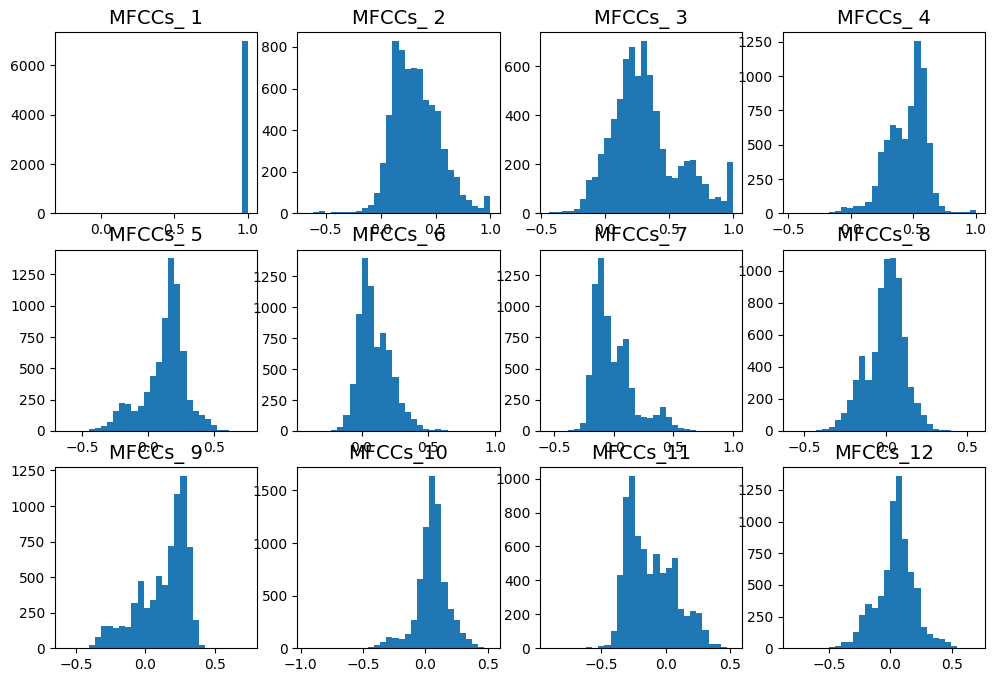

In [ ]:
# Análisis de los datos

print(f'Número de ejemplos: {len(X)}')
print(f'Número de características: {len(X.columns)}')
print(f'Número de familias: {len(ground_truth_family.unique())}')
print(f'Número de géneros: {len(ground_truth_genus.unique())}')
print(f'Número de especies: {len(ground_truth_species.unique())}')
print(f'Número de clases: {len(ground_truth.unique())}')

# Visualización de las características

plt.figure(figsize=(12, 8))

for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.hist(X.iloc[:, i - 1], bins=30)
    plt.title(X.columns[i - 1])

Quito la primera dimesión, porque es nula su variabilidad.

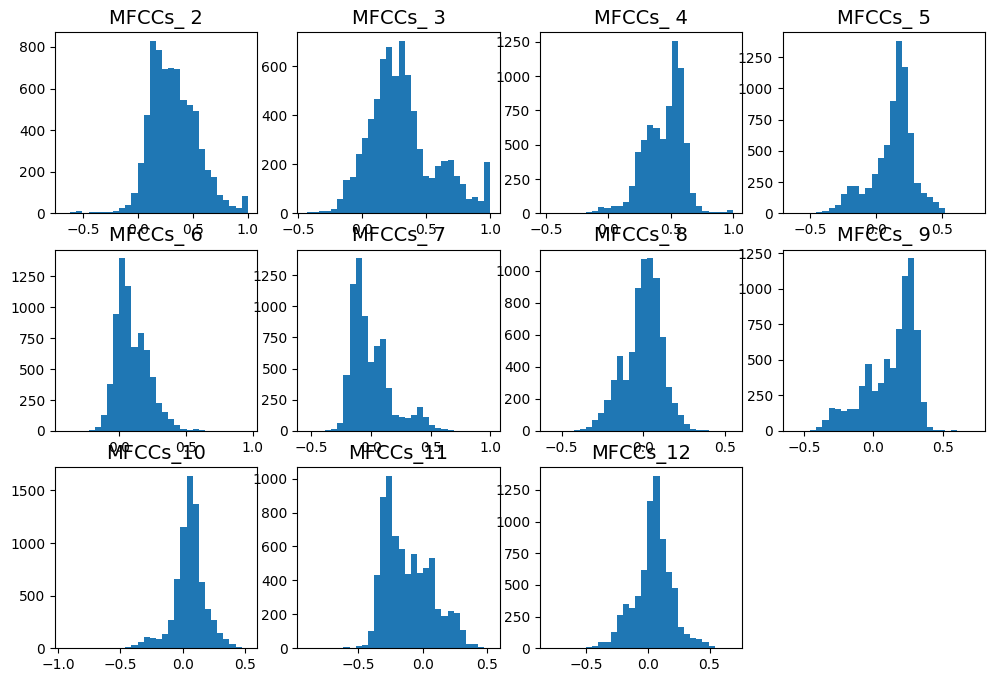

In [ ]:
# Se observa que la primera característica no tiene variabilidad, por lo que se elimina

X = X.drop(columns=['MFCCs_ 1'])

# Visualización de las características

plt.figure(figsize=(12, 8))

for i in range(1, 12):
    plt.subplot(3, 4, i)
    plt.hist(X.iloc[:, i - 1], bins=30)
    plt.title(X.columns[i - 1])

Para quitar los outlayers, utilizo el KNN para ver la distancia en la que cada instancia se separa con sus vecinos.

Donde haya un punto de inflesión es el valor de epsilon que debo utilizar para encontrar las anomalias.

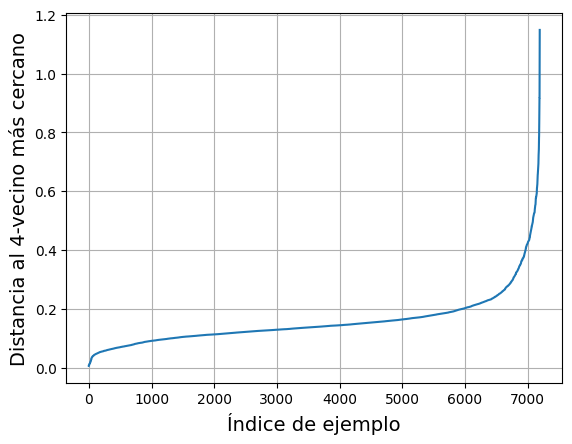

In [ ]:
# Gráfico de k-distancia más cercana (k-nearest neighbor distance plot)

from sklearn.neighbors import NearestNeighbors

k = 4

neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.xlabel('Índice de ejemplo')
plt.ylabel(f'Distancia al {k}-vecino más cercano')
plt.grid()

Se observa que el punto de inflesión es de alrededor una distancia de 0.3, por lo que es e valor de epsilon que usaré para eliminar la contaminación

In [ ]:
# Deteccion de anomalías con DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)

dbscan.fit(X)

anomalies = np.sum(dbscan.labels_ == -1) / len(X) * 100

print(f'Porcentaje de anomalías: {anomalies}%')
print(f'Número de anomalías: {np.sum(dbscan.labels_ == -1)}')

# Eliminación de las anomalías

X_clean = X[dbscan.labels_ != -1]
ground_truth_family_clean = ground_truth_family_encode[dbscan.labels_ != -1].flatten()
ground_truth_genus_clean = ground_truth_genus_encode[dbscan.labels_ != -1].flatten()
ground_truth_species_clean = ground_truth_species_encode[dbscan.labels_ != -1].flatten()
ground_truth_clean = ground_truth_encode[dbscan.labels_ != -1].flatten()

print(f'Número de ejemplos tras eliminar anomalías: {len(X_clean)}')

Porcentaje de anomalías: 6.754690757470466%
Número de anomalías: 486
Número de ejemplos tras eliminar anomalías: 6709


Normalizo los datos con un MinMaxScaler para tener los datos normalizados a la hora de analizar los distintos modelos de clustering.

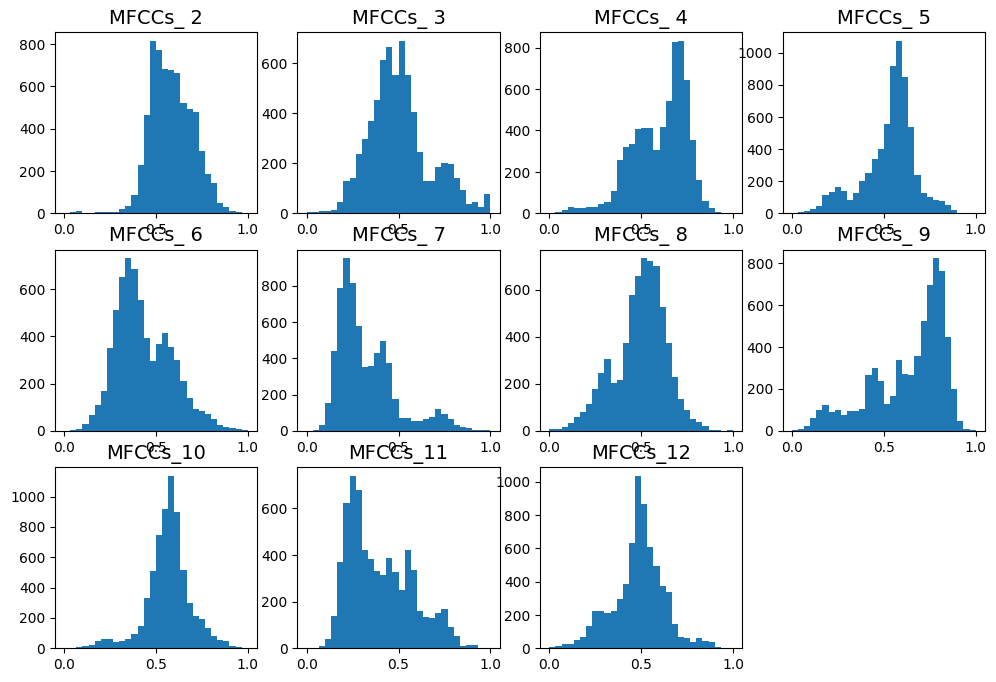

In [ ]:
# Normalización de los datos

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_clean)

plt.figure(figsize=(12, 8))

for i in range(1, 12):
    plt.subplot(3, 4, i)
    plt.hist(X_scaled[:, i - 1], bins=30)
    plt.title(X.columns[i - 1])

Reduzco la dimensionalidad de los datos para agilizar los datos. Me quedo con una varianza del 95%.

Número de componentes: 10


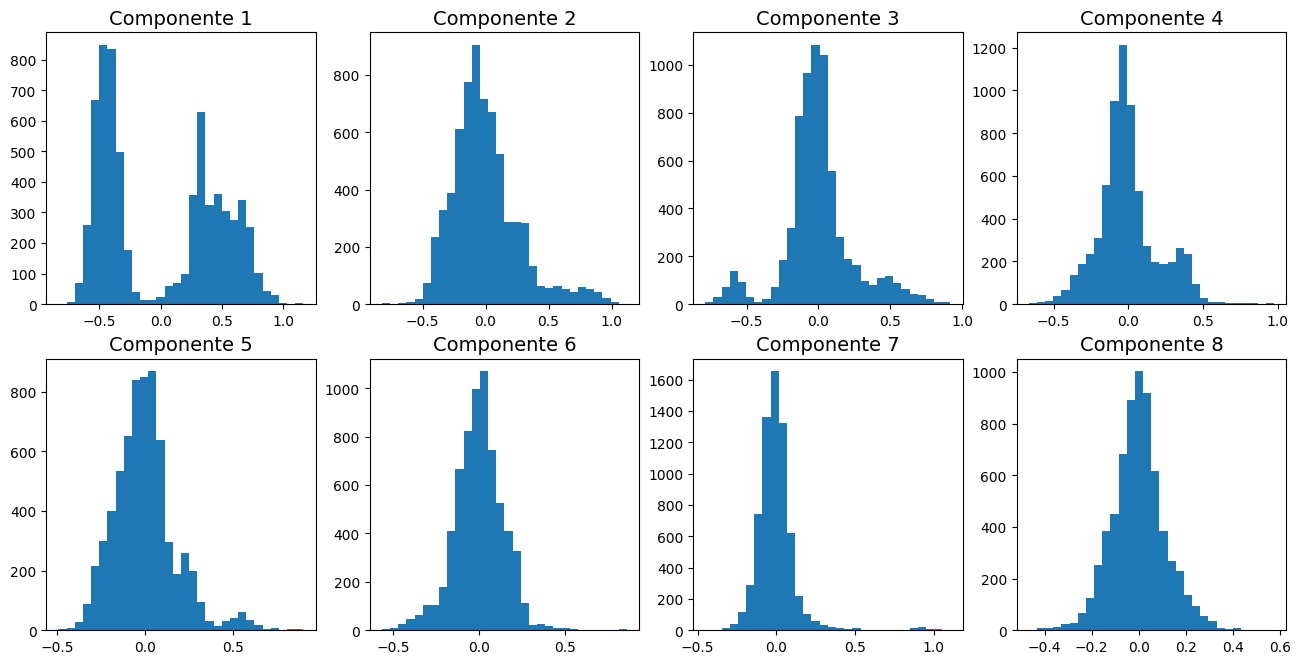

In [ ]:
# Reducción de la dimensionalidad con PCA

from sklearn.decomposition import PCA

pca = PCA(0.95)

X_pca = pca.fit_transform(X_scaled)

print(f'Número de componentes: {pca.n_components_}')

n_cols = 4
n_rows = (pca.n_components_ - 1) // n_cols + 1

plt.figure(figsize=(16, 12))

for i in range(1, pca.n_components_-1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(X_pca[:, i - 1], bins=30)
    plt.title(f'Componente {i}')

Pruebo clustering con KMeans para ver un número de clusters adecuado.

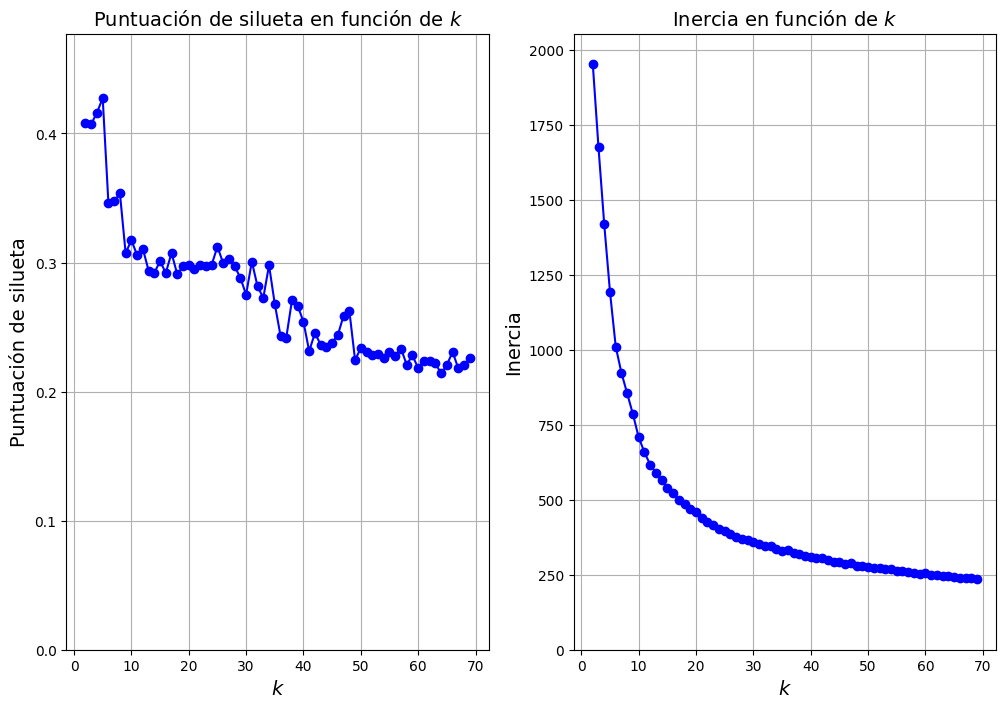

In [ ]:
# Clustering con KMeans

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = range(2, 70)

inercias = []
silhouette_scores = []

for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inercias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))


plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(n_clusters, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Puntuación de silueta")
plt.ylim(0, max(silhouette_scores) + 0.05)
plt.title("Puntuación de silueta en función de $k$")
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(n_clusters, inercias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inercia")
plt.ylim(0, max(inercias) + 100)
plt.title("Inercia en función de $k$")
plt.grid(True)
plt.show()

Eligiré a final un valor de clusters de 15, porque es más o menos donde comienza el codo de la gráfica de la inercia, que indica que más o menos es el valor adecuado para el valor de n_clusters.

Veré después si se parece a la taxonomía Especies que es la que más se acerca en cuanto a número.

Ahora pruebo con DBSCAN. Pruebo diferentes valores de epsilon, para quedarme con el valor más adecuado vasado con el valor de silueta.

eps=0.1, número de clusters: 21
eps=0.15, número de clusters: 23
eps=0.17, número de clusters: 26
eps=0.2, número de clusters: 23
eps=0.25, número de clusters: 13
eps=0.3, número de clusters: 6
eps=0.35, número de clusters: 4
eps=0.4, número de clusters: 4


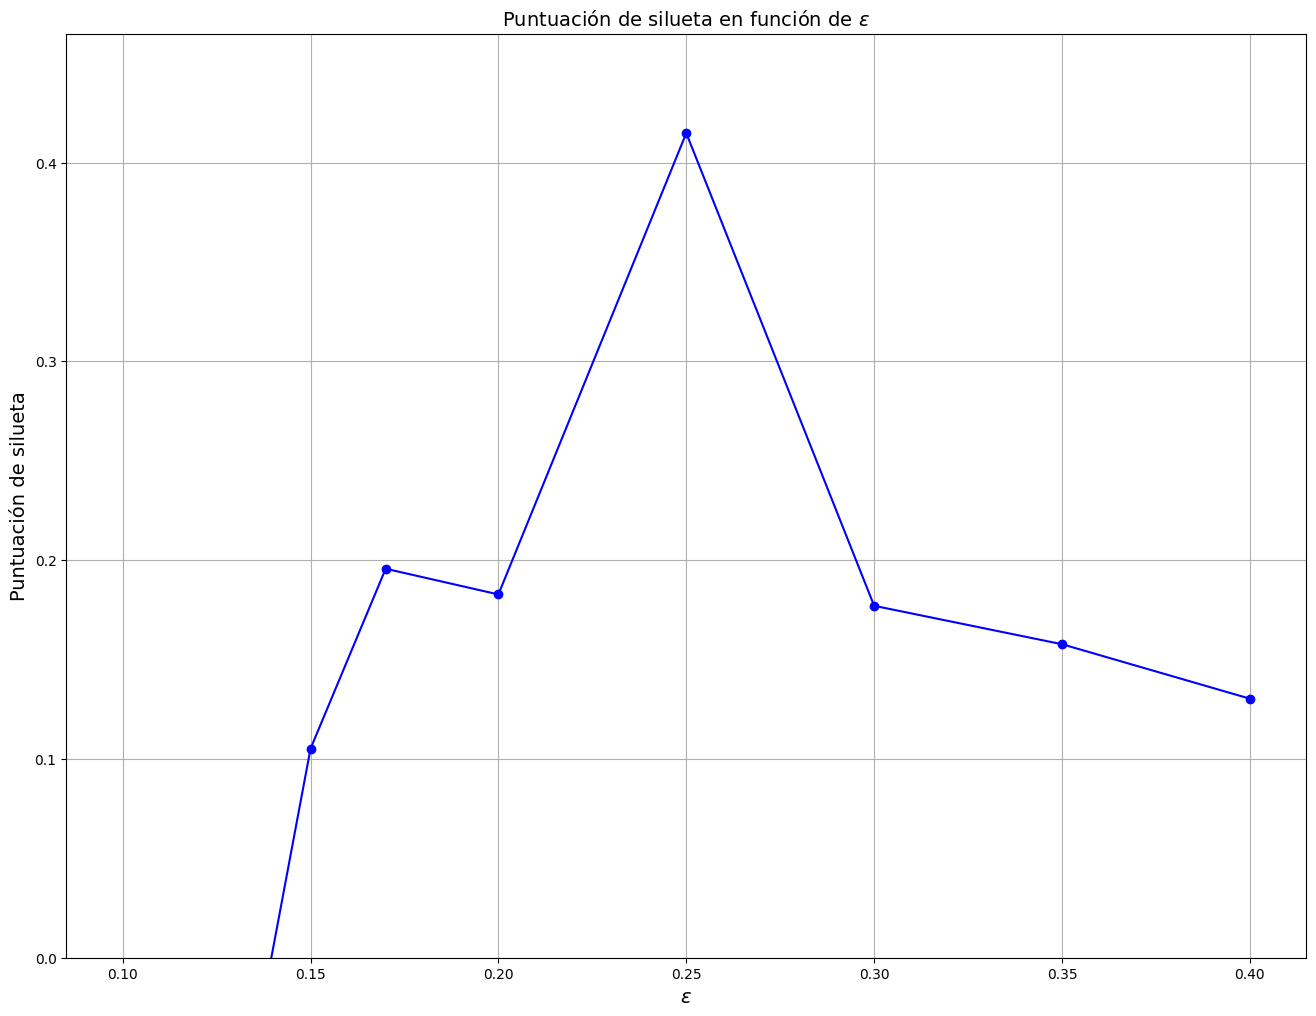

In [ ]:
# Clustering con DBSCAN

from sklearn.cluster import DBSCAN

epsilons = [0.1, 0.15, 0.17, 0.2, 0.25, 0.3, 0.35, 0.4]

silhouette_scores = []

for eps in epsilons:
    dbscan = DBSCAN(eps=eps, min_samples=10)
    dbscan.fit(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, dbscan.labels_))
    print(f'eps={eps}, número de clusters: {len(np.unique(dbscan.labels_))}')

plt.figure(figsize=(16, 12))

plt.plot(epsilons, silhouette_scores, "bo-")
plt.xlabel("$\epsilon$")
plt.ylabel("Puntuación de silueta")
plt.ylim(0, max(silhouette_scores) + 0.05)
plt.title("Puntuación de silueta en función de $\epsilon$")
plt.grid(True)
plt.show()

Como es mejor con epsilon de 0.25, lo usaré para el resultado final.

Ese valor de epsilon da un total de 13 clusters, que se parece al número de especies, 10. Después veremos y se ajusta a esa taxonomia.

Ahora pruebo con BIRCH, analizando los distintos valores del parámetro thresholds.

threshold=0.1, n_clusters=2156
threshold=0.2, n_clusters=216
threshold=0.25, n_clusters=91
threshold=0.3, n_clusters=48
threshold=0.35, n_clusters=39
threshold=0.4, n_clusters=24
threshold=0.45, n_clusters=15
threshold=0.5, n_clusters=18
threshold=0.55, n_clusters=9
threshold=0.6, n_clusters=6
threshold=0.65, n_clusters=7
threshold=0.7, n_clusters=6


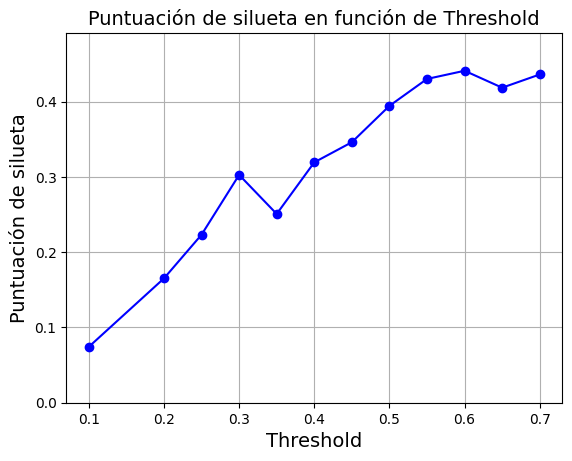

In [ ]:
# Clustering con Birch

from sklearn.cluster import Birch

thresholds = [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

silhouette_scores = []

for threshold in thresholds:
    birch = Birch(n_clusters=None, threshold=threshold)
    birch.fit(X_pca)
    print(f'threshold={threshold}, n_clusters={len(np.unique(birch.labels_))}')
    silhouette_scores.append(silhouette_score(X_pca, birch.labels_))

plt.plot(thresholds, silhouette_scores, "bo-")
plt.xlabel("Threshold")
plt.ylabel("Puntuación de silueta")
plt.ylim(0, max(silhouette_scores) + 0.05)
plt.title("Puntuación de silueta en función de Threshold")
plt.grid(True)
plt.show()

Probaré con un valor de 0.6 para el threshold, porque es un valor en el que se ecuentra un máximo de silueta.

Con threshold = 0.6 nos dan 6 clusters diferentes. Veré si se parece a la clasificación de especies géneros o familias.

Modelo: KMeans(n_clusters=15, n_init=10, random_state=42), número de clusters: 15
Davies-Bouldin: 1.127564179628483
Silueta: 0.30100437486729564
Calinski-Harabasz: 2488.266547206231
	Ground truth: Familia
		Homogeneidad: 0.863297562131316
		Completitud: 0.3104708738956952
		V-measure: 0.4566978295210605

	Ground truth: Género
		Homogeneidad: 0.8155121450656158
		Completitud: 0.41346482184497774
		V-measure: 0.5487256357937915

	Ground truth: Especie
		Homogeneidad: 0.856880408181181
		Completitud: 0.5687808074566914
		V-measure: 0.6837208238719578

	Ground truth: RecordID
		Homogeneidad: 0.591248409151583
		Completitud: 0.8344444498242871
		V-measure: 0.6921041237989787

Modelo: DBSCAN(eps=0.25, min_samples=10), número de clusters: 13
Davies-Bouldin: 1.693341276557109
Silueta: 0.41478649541982054
Calinski-Harabasz: 1396.4808456537703
	Ground truth: Familia
		Homogeneidad: 0.8288662656806823
		Completitud: 0.4444245643579412
		V-measure: 0.5786086263182417

	Ground truth: Género
		Homog

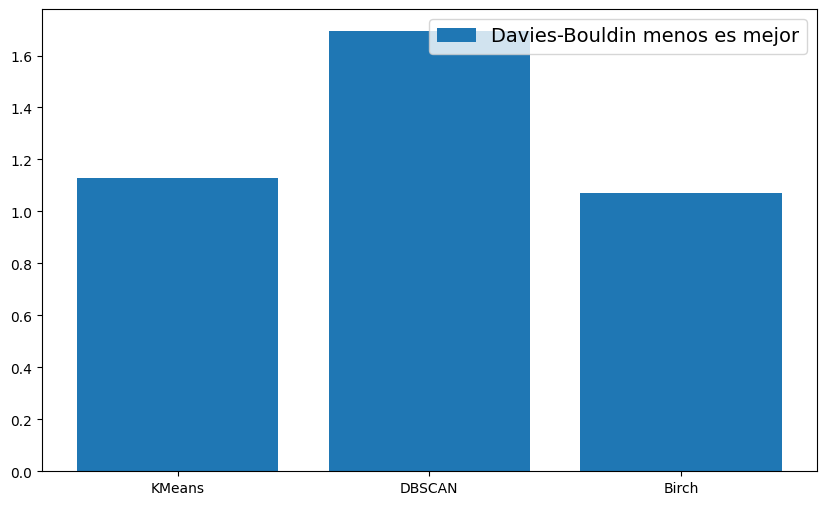

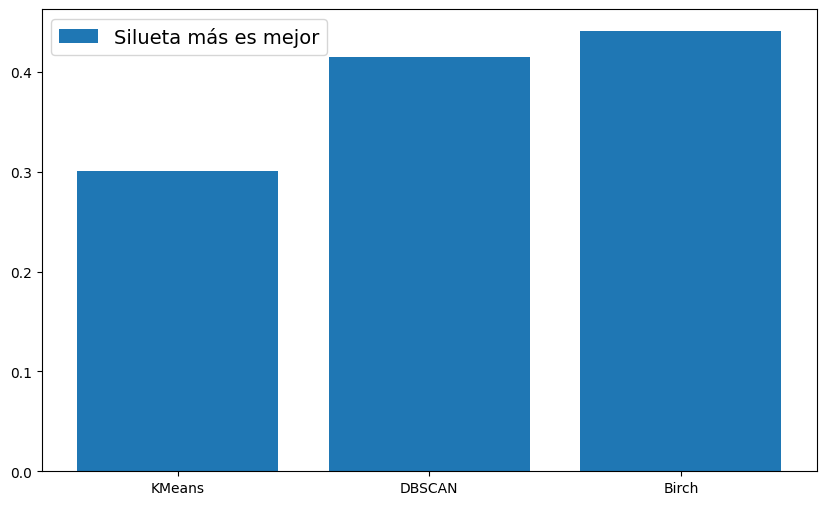

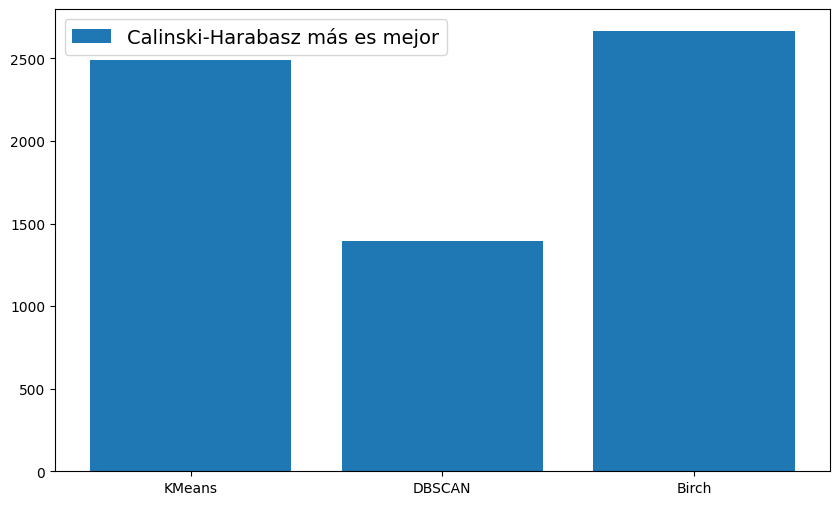

In [ ]:
# Comparación de los resultados

# KMeans con 15 clusters
kmeans = KMeans(n_clusters=15, random_state=42, n_init=10)
# DBSCAN con epsilon=0.25, que dan 13 clusters
dbscan = DBSCAN(eps=0.25, min_samples=10)
# Birch con threshold=0.6, que dan 6 clusters
birch = Birch(n_clusters=None, threshold=0.6)

modelos = [kmeans, dbscan, birch]
modelos_nombres = ['KMeans', 'DBSCAN', 'Birch']
distintos_ground_truth = [ground_truth_family_clean, ground_truth_genus_clean, ground_truth_species_clean, ground_truth_clean]
ground_truth_names = ['Familia', 'Género', 'Especie', 'RecordID']

# Comparación con el ground truth

# Utilizamos davies_bouldin_score, que es un índice de similitud entre clusters, tambien silueta y dunn index

from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, davies_bouldin_score, silhouette_score, calinski_harabasz_score

db = []
sil = []
cal = []

for modelo in modelos:
    modelo.fit(X_pca)
    print(f'Modelo: {modelo}, número de clusters: {len(np.unique(modelo.labels_))}')
    print(f'Davies-Bouldin: {davies_bouldin_score(X_pca, modelo.labels_)}')
    print(f'Silueta: {silhouette_score(X_pca, modelo.labels_)}')
    print(f'Calinski-Harabasz: {calinski_harabasz_score(X_pca, modelo.labels_)}')

    db.append(davies_bouldin_score(X_pca, modelo.labels_))
    sil.append(silhouette_score(X_pca, modelo.labels_))
    cal.append(calinski_harabasz_score(X_pca, modelo.labels_))

    for ground_truth, ground_truth_name in zip(distintos_ground_truth, ground_truth_names):
        print(f'\tGround truth: {ground_truth_name}')
        print(f'\t\tHomogeneidad: {homogeneity_score(ground_truth, modelo.labels_)}')
        print(f'\t\tCompletitud: {completeness_score(ground_truth, modelo.labels_)}')
        print(f'\t\tV-measure: {v_measure_score(ground_truth, modelo.labels_)}')
        print('')


plt.figure(figsize=(10, 6))
plt.bar(modelos_nombres, db, label='Davies-Bouldin menos es mejor')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(modelos_nombres, sil, label='Silueta más es mejor')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(modelos_nombres, cal, label='Calinski-Harabasz más es mejor')
plt.legend()
plt.show()

Veremos como KMeans, DBSCAN y Birch se adecuan con respecto a diferentes criterios de ground truth (Familia, Género, Especie, RecordID).

**Modelos y Métricas de Desempeño**

**Modelo 1: KMeans**
- **Configuración**: `KMeans(n_clusters=15, n_init=10,random_state=42)`
- **Número de clusters**: 15


**Modelo 2: DBSCAN**
- **Configuración**: `DBSCAN(eps=0.25, min_samples=10)`
- **Número de clusters**: 13

**Modelo 3: Birch**
- **Configuración**: `Birch(n_clusters=None, threshold=0.6)`
- **Número de clusters**: 6

**Interpretación de Resultados**

1. **KMeans**:
   - **Métricas internas**: Tiene una buena puntuación de Davies-Bouldin y una Silueta moderada, sugiriendo una estructura de cluster decente pero con cierta superposición.
   - **Ground truth**: Presenta alta homogeneidad en todas las categorías, especialmente en Familia y Especie, indicando que los clusters creados tienen miembros bastante homogéneos. Sin embargo, la completitud es moderada, lo que sugiere que no todos los miembros de una categoría están en el mismo cluster.

2. **DBSCAN**:
   - **Métricas internas**: Davies-Bouldin es peor que KMeans, pero tiene una Silueta mejor, indicando clusters más compactos.
   - **Ground truth**: Muestra buena homogeneidad y completitud en Especie, lo que sugiere que es bastante efectivo para agrupar cantos similares de la misma especie. La V-measure es alta para Especie y Género, lo que indica una buena combinación de homogeneidad y completitud.

3. **Birch**:
   - **Métricas internas**: Tiene la mejor Davies-Bouldin y una Silueta razonable, sugiriendo buena estructura de cluster.
   - **Ground truth**: Tiene menor homogeneidad y completitud comparado con los otros modelos, especialmente en Familia y Género. Sin embargo, la V-measure para Especie es alta, lo que indica que, a pesar de la menor cantidad de clusters, Birch logra captar bien la estructura de las especies. Parece contraintuitivo porque en cuanto a número de clusters se parece más a Familia y Género.

**Conclusiones**

1. **Comparación con taxonomía**: Los resultados sugieren que, en general, los algoritmos de clustering pueden capturar cierta estructura taxonómica en los cantos de ranas. Específicamente, los resultados para Especie son bastante sólidos, indicando que los cantos de diferentes especies son distintivos y pueden ser agrupados con éxito.
2. **Algoritmo preferido**: Para esta tarea, DBSCAN parece ser el más efectivo en términos de balance entre homogeneidad y completitud, especialmente para Especie. Sin embargo, Birch también muestra un buen rendimiento con menos clusters.

## <font color='blue'>Ejercicio 3. DETECCIÓN de ANOMALÍAS con PyOD



### <font color='blue'> Ejemplo de uso de IsolationForest en un conjunto sintético.

<font color='blue'>A continuación, se muestra un ejemplo de uso de IsolationForest (https://pyod.readthedocs.io/en/latest/_modules/pyod/models/iforest.html) en un conjunto sintético. PyOD ofrece un wrapper del Isolation Forest de scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) con más funcionalidades.

#### <font color='blue'>Paso 1: Construimos el Modelo

<font color='blue'>Generamos $6$ variables y $500$ instancias para entrenamiento y test. Aunque los datos tienen la variable target $Y$, los modelos no supervisados solo usarán las variables $X$. La variable $Y$ es solo para validación. El porcentaje de outliers se pone al $5\%$ con `contamination=0.05`. Se dibuja un scatter plot de las dos primeras variables. Los puntos amarillos son outliers, y los puntos violeta son los datos normales.

In [ ]:
!pip install pyod

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data
contamination = 0.05 # percentage of outliers
n_train = 500       # number of training points
n_test = 500        # number of testing points
n_features = 6      # number of features
X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train,
    n_test=n_test,
    n_features= n_features,
    contamination=contamination,
    random_state=123)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190250 sha256=111cb5dab1144c72fdf059facf04a456dc8a3b592175e7fbd698224c217540fc
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


0         1         2         3         4         5
0  2.396090  2.092611  2.073392  1.988262  1.953473  2.450997
1  1.631040  1.746182  1.898050  2.380148  1.967332  1.858916
2  1.824683  2.131412  2.028829  1.703454  2.502966  2.119108
3  2.106098  2.165173  2.340826  2.170109  1.749139  1.678661
4  1.829647  1.775596  1.829438  2.054768  1.577190  1.594549

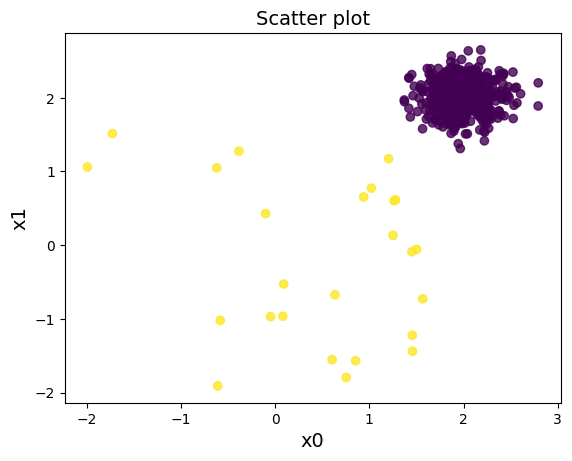

In [ ]:
plt.scatter(X_train_pd[0], X_train_pd[1],c=y_train, alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

<font color='blue'>Declaramos y ajustamos el modelo. El tamaño de un árbol `max_samples`es de $40$ instancias. En Isolation Forest (IForest, https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest), no es necesario asignar un tamaño de árbol grande, puesto que tamaños pequeños pueden producir mejores iTrees. El porcentaje de outliers será $5\%$ usando `contamination=0.05`. Si no se indica, este valor se fijará automáticamente en $10\%$.

<font color='blue'>La función `decision_function()` genera el _outlier score_ de cada ejemplo del conjunto de datos, y la función `predict()` assigna las etiquetas ($1$: outlier; $0$: no outlier) basándose en la tasa de contaminación proporcionada ($5\%$ en nuestro caso). El umbral que vemos más abajo (`threshold_`) se emplea para identificar los `n_samples*contamination` ejemplos más atípicos de acuerdo a su `decision_scores_`.

In [ ]:
from pyod.models.iforest import IForest
isft = IForest(contamination=0.05, max_samples=40, behaviour='new')
isft.fit(X_train)

# Training data
y_train_scores = isft.decision_function(X_train)
y_train_pred = isft.predict(X_train)

# Test data
y_test_scores = isft.decision_function(X_test)
y_test_pred = isft.predict(X_test) # outlier labels (0 or 1)

# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , isft.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))


The threshold for the defined contamination rate: -5.937958458268611e-15
The training data: {0: 475, 1: 25}
The training data: {0: 473, 1: 27}


<font color='blue'> Vemos que, efectivamente, este número de ejemplos más atípicos se corresponde con `X_train.shape[0]*0.05`.

In [ ]:
X_train.shape[0]*0.05

25.0

<font color='blue'> Vamos a intentar marcar con una cruz roja los $25$ ejemplos más atípicos en la figura.  

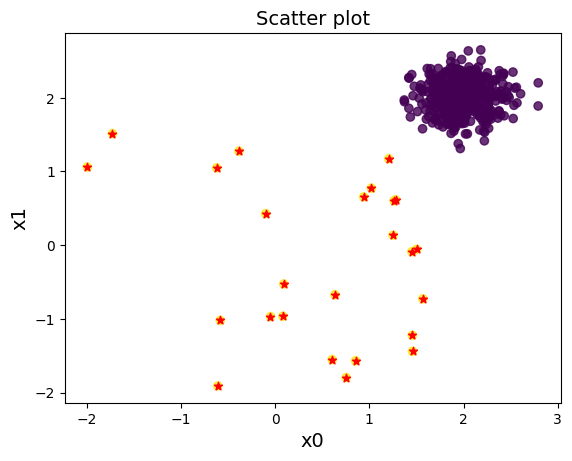

In [ ]:
plt.scatter(X_train_pd[0], X_train_pd[1],c=y_train, alpha=0.8)
indexes = np.squeeze(np.array(np.where(isft.threshold_ < isft.decision_scores_)))
plt.scatter(X_train[indexes,0], X_train[indexes,1],marker='*',color='r')
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

##### <font color='blue'>Paso 1.1: Parámetros del Modelo

In [ ]:
isft.get_params()

{'behaviour': 'new',
 'bootstrap': False,
 'contamination': 0.05,
 'max_features': 1.0,
 'max_samples': 40,
 'n_estimators': 100,
 'n_jobs': 1,
 'random_state': None,
 'verbose': 0}

* <font color='blue'>`max_samples` es el número de muestras a escoger en $X$ para entrenar cada estimador base.
* <font color='blue'>`n_estimators` es el número de árboles en el ensemble. El valor por defecto es de 100 árboles.
* <font color='blue'>`max_features` es el número de características a escoger en $X$ para entrenar cada estimador base. El valor por defecto es $1.0$.
* <font color='blue'>`n_jobs` es el número de tareas a ejecutar en paralelo para `fit`y `predict`. El valor por defecto es $1.0$. Si se pone a $-1$, el número de tareas se iguala al número de cores.

##### <font color='blue'>Paso 1.2: Importancia de las Variables

<font color='blue'>Debido a que IForest trabaja dentro del marco de los árboles de decisión, podemos calcular y entender la importancia relativa de las características para determinar outliers. La importancia de las características se mide por el [índice de impureza Gini](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity), cuya suma es $1.0$. A mayor valor, mayor importancia tiene la característica. En nuestro caso, la primera (índice $0$) y quinta (índice $4$) características serían las más relevantes.

In [ ]:
isft_vi = isft.feature_importances_
isft_vi

array([0.13322735, 0.18271343, 0.19738877, 0.16054109, 0.15652314,
       0.16960622])

In [ ]:
np.sum(isft_vi)

1.0000000000000002

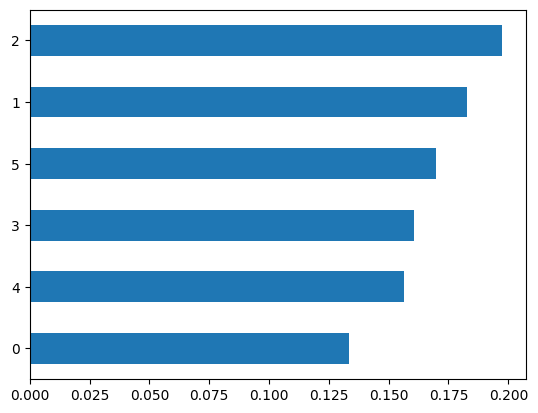

In [ ]:
from matplotlib import pyplot as plt
for_plot = pd.DataFrame({'x_axis':X_train_pd.columns, 'y_axis':isft_vi}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh();

####<font color='blue'> Paso 2: Determinar un Umbral Razonable

<font color='blue'>El umbral se puede determinar por el histograma de los _outlier scores_. La siguiente figura sugiere un umbral alrededor de $0.0$. Esto significa que los scores de la mayoría de los datos normales son menores que $0.0$. Los scores de outlier de los datos anormales están en un rango más alto.

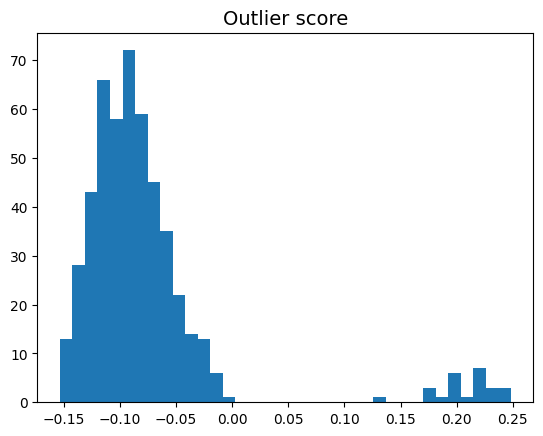

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

#### <font color='blue'>Paso 3: análisis estadístico descriptivo

<font color='blue'>Realicemos un análisis descriptivo de los grupos normal y outlier tanto en entrenamiento como en test. En esta ocasión utilizamos directamente el threshold calculado por Isolation Forest, pero debemos ser conscientes de que podemos emplear el valor que consideremos más oportuno (en base al histograma anterior o a cualquier otra información de que dispongamos). Dicho umbral hará que cambien las tablas que se muestran a continuación. Por ejemplo, si hacemos `threshold = isft.threshold_ - 0.05` veremos que se incrementa el porcentaje de ejemplos considerados outliers (pasando del $5\%$ al $11.2\%$).

In [ ]:
threshold = isft.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(3).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold) #y_train_scores = isft.decision_scores_

Group  Count  Count %      0      1      2      3      4      5  \
0   Normal    475     95.0  2.003  2.011  2.006  1.991  2.008  1.985   
1  Outlier     25      5.0  0.454 -0.209 -0.475 -0.231 -0.035 -0.056   

   Anomaly_Score  
0         -0.091  
1          0.208

In [ ]:
descriptive_stat_threshold(X_test,y_test_scores, threshold)

Group  Count  Count %      0      1      2      3      4      5  \
0   Normal    473     94.6  2.019  2.013  2.008  1.989  2.005  2.002   
1  Outlier     27      5.4  0.108 -0.335 -0.020  0.083  0.113  0.246   

   Anomaly_Score  
0         -0.090  
1          0.192

In [ ]:
X_train[y_train==1,0].mean()

0.4535480626515198

<font color='blue'>Las tablas de arriba incluyen los elementos esenciales para la evaluación del modelo e interpretación de resultados.

* <font color='blue'>Tamaño del grupo de outlier (`Count %`) de las tablas. Muestra un $5\%$ en cada caso ($5.2\%$ en test). Es importante recordar que el tamaño del grupo de outliers viene determinado por el threshold, que a su vez se calcula en base a la contaminación proporcionada.
* <font color='blue'>La media del score de anomalía. En las tablas, la media del score del grupo de outlier es más grande que la del grupo normal, lo que confirma que el grupo  outlier debería tener y tiene mayores scores de anomalía.
* <font color='blue'>Estadísticas relativas a las variable de entrada agrupadas en normales (grupo $0$) y atípicas (grupo $1$). Por ejemplo, el valor asociado con la columna $0$ y fila $0$ (normal) se corresponde con `X_train[y_train==0,0].mean()`, es decir, $2.003$. La segunda fila (grupo $1$) de la misma columna sería `X_train[y_train==1,0].mean()`, es decir, $0.454$. Se puede observar que la media de las características en el grupo de outliers son más pequeñas que en el grupo de ejemplos normales. Si esto tiene sentido o no depende del problema en cuestión.


<font color='blue'>Debido a que tenemos el ground truth en nuestros datos, podemos generar una matriz de confusión para entender el rendimiento del modelo.

In [ ]:
def confusion_matrix_threshold(
    actual,score, threshold):
    Actual_pred = pd.DataFrame({'Actual': actual, 'Pred': score})
    Actual_pred['Pred'] = np.where(Actual_pred['Pred']<=threshold,0,1)
    cm = pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])
    return (cm)

confusion_matrix_threshold(y_train,y_train_scores,threshold)

Pred      0   1
Actual         
0.0     475   0
1.0       0  25

### <font color='blue'>Ejercicio.

<font color='blue'>Tras el ejemplo anterior, ahora presentamos el ejercicio a resolver por el alumnado en relación a la detección de anomalías con PyOD (https://pyod.readthedocs.io/en/latest/). En concreto, los estudiantes trabajarán con el conjunto de datos _Statlog_ (satélite Landsat) del repositorio de aprendizaje automático de la UCI (https://odds.cs.stonybrook.edu/satellite-dataset/). Se trata de un conjunto de datos de clasificación multiclase, en donde se combinan las tres clases más pequeñas para formar la clase de valores atípicos. En PRADO el alumnado dispone del fichero `satellite.mat` con los datos necesarios para realizar el ejercicio. A continuación se aporta una descripción general del dataset:
* <font color='blue'> $X$ = datos puntuales multidimensionales,
* <font color='blue'> $y$ = etiquetas ($1$ = valores atípicos, $0$ = valores atípicos).
* <font color='blue'> $6435$ instancias, $36$ características y $2036$ ($32\%$) anomalías. Este último número se puede recuperar haciendo `np.sum(Y==1)`.

<font color='blue'> Referencias:
* <font color='blue'>  Liu, Fei Tony, Kai Ming Ting, and Zhi-Hua Zhou. “Isolation forest.” 2008 Eighth IEEE International Conference on Data Mining. IEEE, 2008.
* <font color='blue'>  K. M. Ting, J. T. S. Chuan, and F. T. Liu. “Mass: A New Ranking Measure for Anomaly Detection.“, IEEE Transactions on Knowledge and Data Engineering, 2009.




## <font color='blue'> Objetivos
    
<font color='blue'> El objetivo del presente ejercicio es analizar los patrones subyacentes a los datos, sin tomar en cuenta su _ground truth_, y determinar si las anomalías que se detectan con algoritmos avanzados coinciden con la realidad. Se debe usar un algoritmo cualquiera de la librería PyOD (https://github.com/yzhao062/pyod), como podría ser Isolation Forest. Se valorará positivamente que el estudiante escoga un algoritmo diferente, en cuyo caso, se proporcionará una breve explicación de su funcionamiento.

<font color='blue'> Para llevar a cabo este objetivo principal se llevarán a cabo los siguientes objetivos secundarios:
1. <font color='blue'> Realización de un análisis exploratorio para una primera observación de las distribuciones de los datos.
2. Construcción y ajuste del modelo.
3. Experimentación y determinación de los umbrales más razonables para la identificación de anomalías.
4. Comprobación de errores usando la información Ground Truth del conjunto de datos.

### <font color='blue'> Resultados Esperados
<font color='blue'> Se espera que los resultados que se obtengan de la detección de anomalías sean razonablemente parecidos a la realidad.
    
<font color='blue'>Como el fichero es un `.mat` (matlab), lo primero que haremos será tranformarlo en `.csv` para trabajar con él. Nos quedamos solo con la parte no supervisada (es decir, con las entradas, sin las salidas deseadas / etiquetas).

In [ ]:
import scipy.io
import pandas as pd

from google.colab import drive
drive.mount("/content/drive/")

dataFolder = 'drive/MyDrive/Colab Notebooks/clustering/'

# Cargar el archivo .mat
mat = scipy.io.loadmat(dataFolder + '/satellite.mat')
print(mat.keys())

X = mat['X']
Y = mat['y']

# Convertir a un DataFrame de pandas ignorando las etiquetas
# IMPORTANTE: estamos ante un problema no supervisado. No podemos emplear las etiquetas para agrupar o analizar los datos.
df = pd.DataFrame(X)



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [ ]:
df

0    1    2   3   4    5    6   7   8    9   ...   26   27  28   29  \
0     92  115  120  94  84  102  106  79  84  102  ...  134  104  88  121   
1     84  102  106  79  84  102  102  83  80  102  ...  128  100  84  107   
2     84  102  102  83  80  102  102  79  84   94  ...  113   87  84   99   
3     80  102  102  79  84   94  102  79  80   94  ...  104   79  84   99   
4     84   94  102  79  80   94   98  76  80  102  ...  104   79  84  103   
...   ..  ...  ...  ..  ..  ...  ...  ..  ..  ...  ...  ...  ...  ..  ...   
6430  60   83   96  85  64   87  100  88  64   83  ...  104   92  66   87   
6431  64   79  100  85  56   71   96  85  56   68  ...  100   85  66   83   
6432  56   68   91  81  56   64   91  81  53   64  ...  100   81  59   87   
6433  56   68   87  74  60   71   91  81  60   64  ...   96   74  59   83   
6434  60   71   91  81  60   64  104  99  56   64  ...   92   74  59   83   

       30   31  32   33   34  35  
0     128  100  84  107  113  87  
1     113   87  84   99  104  79  
2     104   79  84   99  104  79  
3     104   79  84  103  104  79  
4     104   79  79  107  109  87  
...   ...  ...  ..  ...  ...  ..  
6430  108   89  63   83  104  85  
6431  100   85  63   83  100  81  
6432   96   81  63   83   92  74  
6433   92   74  59   83   92  70  
6434   92   70  63   79  108  92  

[6435 rows x 36 columns]

The threshold for the defined contamination rate: 0.0
The training data: {0: 6114, 1: 321}


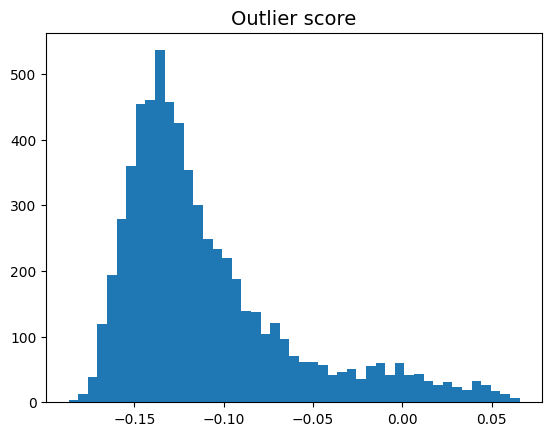

In [ ]:
#A CUBRIR POR EL ALUMNADO

from pyod.models.iforest import IForest

isft = IForest(contamination=0.05, max_samples=40, behaviour='new', random_state=42)

isft.fit(df)

# Training data

y_train_scores = isft.decision_function(df)
y_train_pred = isft.predict(df)

# Threshold for the defined comtanimation rate

print("The threshold for the defined contamination rate:" , isft.threshold_)
print("The training data:", count_stat(y_train_pred))

plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

threshold = isft.threshold_ # Or other value from the above histogram


Vamos a ir aumentando la contaminación y visualizando gracias a PCA para ver como van evolucionando los outliers.

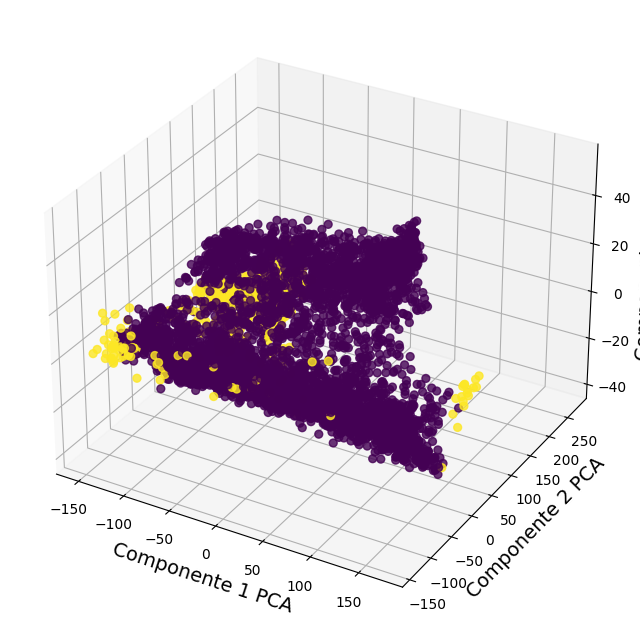

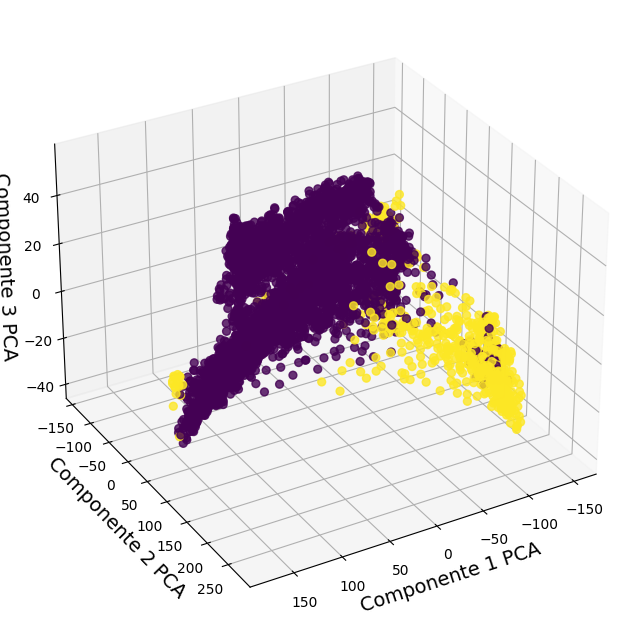

In [ ]:
# Probamos con un valor de contaminación del 10%

isft = IForest(contamination=0.1, behaviour='new', random_state=42)

isft.fit(df)

# Training data

y_train_scores = isft.decision_function(df)
y_train_pred = isft.predict(df)

# Reducimos la dimensionalidad con PCA a 3 dimensiones para visualizar los resultados

from sklearn.decomposition import PCA

pca = PCA(n_components=3)

df_pca = pca.fit_transform(df)

# Dibujamos en 3 dimensiones

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=y_train_pred, s=32, alpha=.8)
ax.set_xlabel('Componente 1 PCA')
ax.set_ylabel('Componente 2 PCA')
ax.set_zlabel('Componente 3 PCA')
plt.show()

# Rotamos la gráfica para verla mejor

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=y_train_pred, s=32, alpha=.8)
ax.set_xlabel('Componente 1 PCA')
ax.set_ylabel('Componente 2 PCA')
ax.set_zlabel('Componente 3 PCA')

# Rotamos la gráfica para verla mejor

ax.view_init(elev=30, azim=60)

plt.show()

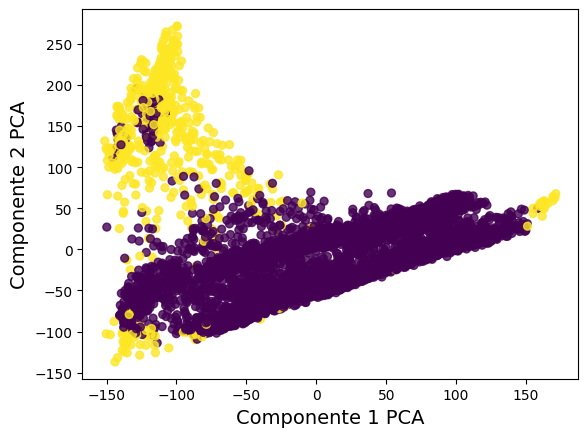

In [ ]:
# Los vemos en 2D

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_train_pred, s=32, alpha=.8)
plt.xlabel('Componente 1 PCA')
plt.ylabel('Componente 2 PCA')

plt.show()

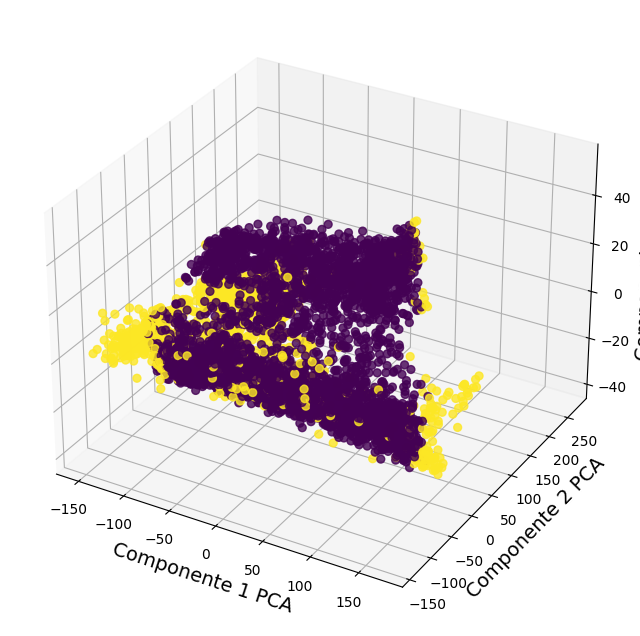

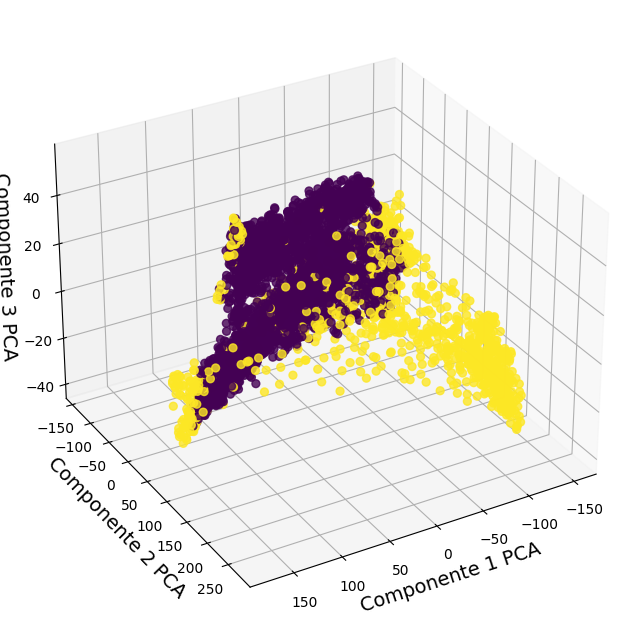

In [ ]:
# Probamos con un valor de contaminación del 20%

isft = IForest(contamination=0.2, behaviour='new', random_state=42)

isft.fit(df)

# Training data

y_train_scores = isft.decision_function(df)
y_train_pred = isft.predict(df)

# Dibujamos en 3 dimensiones

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=y_train_pred, s=32, alpha=.8)
ax.set_xlabel('Componente 1 PCA')
ax.set_ylabel('Componente 2 PCA')
ax.set_zlabel('Componente 3 PCA')

plt.show()

# Rotamos la gráfica para verla mejor

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=y_train_pred, s=32, alpha=.8)
ax.set_xlabel('Componente 1 PCA')
ax.set_ylabel('Componente 2 PCA')
ax.set_zlabel('Componente 3 PCA')

# Rotamos la gráfica para verla mejor

ax.view_init(elev=30, azim=60)

plt.show()

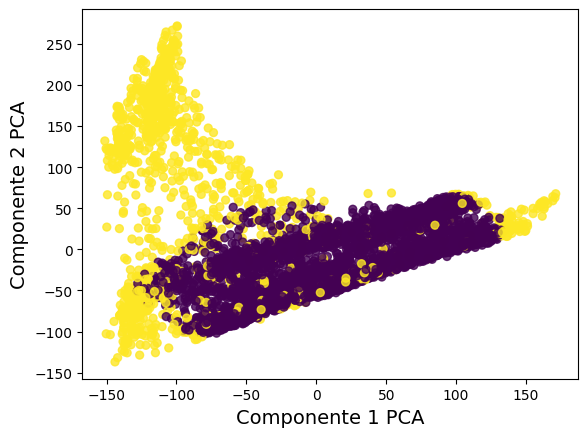

In [ ]:
# Los vemos en 2D

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_train_pred, s=32, alpha=.8)
plt.xlabel('Componente 1 PCA')
plt.ylabel('Componente 2 PCA')

plt.show()

Se ve como los datos que no son de anomalía, forman un resctangulo.

Se observa también como IsolationForest coge como anomalías datos que no son anomalías.

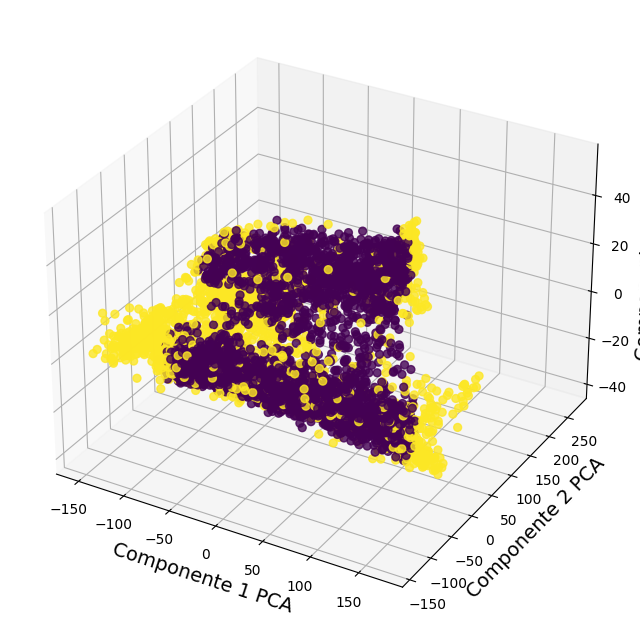

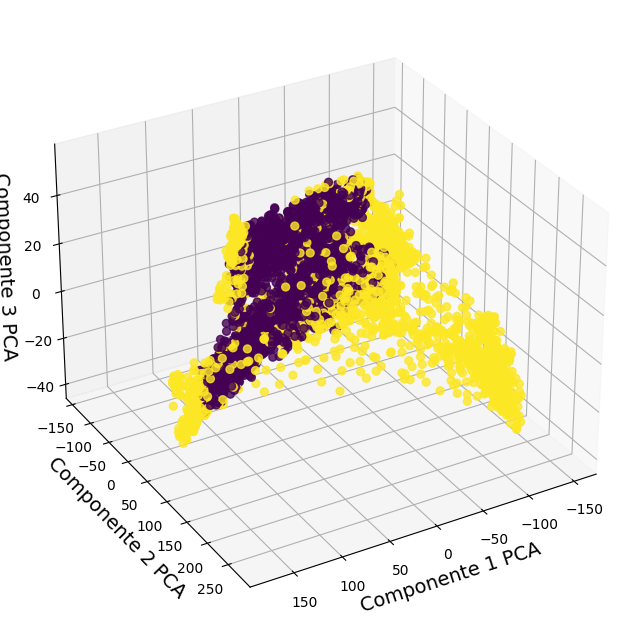

In [ ]:
# Probamos con un valor de contaminación del 30%

isft = IForest(contamination=0.3, behaviour='new', random_state=42)

isft.fit(df)

# Training data

y_train_scores = isft.decision_function(df)
y_train_pred = isft.predict(df)

# Dibujamos en 3 dimensiones

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=y_train_pred, s=32, alpha=.8)
ax.set_xlabel('Componente 1 PCA')
ax.set_ylabel('Componente 2 PCA')
ax.set_zlabel('Componente 3 PCA')

plt.show()

# Rotamos la gráfica para verla mejor

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=y_train_pred, s=32, alpha=.8)
ax.set_xlabel('Componente 1 PCA')
ax.set_ylabel('Componente 2 PCA')
ax.set_zlabel('Componente 3 PCA')

# Rotamos la gráfica para verla mejor

ax.view_init(elev=30, azim=60)

plt.show()

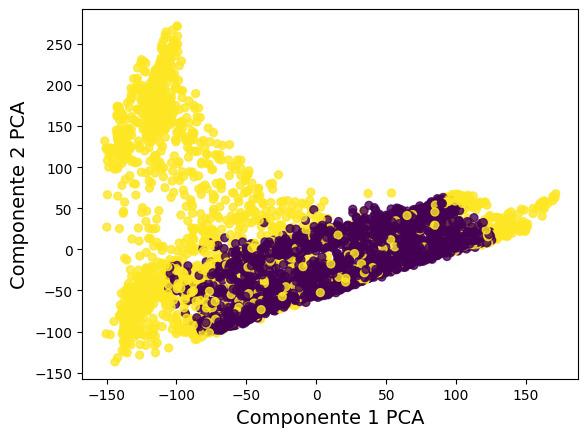

In [ ]:
# Los vemos en 2D

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_train_pred, s=32, alpha=.8)
plt.xlabel('Componente 1 PCA')
plt.ylabel('Componente 2 PCA')

plt.show()

Más o menos nos hemos quitado los outliers pero quedan unos pocos.

También cada vez aumentan los falsos positivos.

In [ ]:
# La contaminación del 30% es casi exacto, solo necesita un pequeño ajuste

isft = IForest(contamination=0.33, behaviour='new', random_state=42)

isft.fit(df)

# Training data

y_train_scores = isft.decision_function(df)
y_train_pred = isft.predict(df)

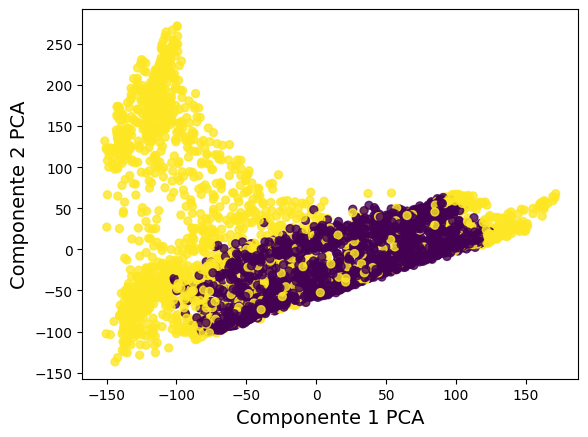

In [ ]:
# Los vemos en 2D

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_train_pred, s=32, alpha=.8)
plt.xlabel('Componente 1 PCA')
plt.ylabel('Componente 2 PCA')

plt.show()

In [ ]:
descriptive_stat_threshold(df,y_train_scores, threshold)

Group  Count    Count %       0       1        2       3       4       5  \
0   Normal   4311  66.993007  72.923  90.845   98.228  78.498  72.790  90.648   
1  Outlier   2124  33.006993  62.250  68.880  101.447  90.904  61.763  68.214   

         6  ...      27      28      29       30      31      32      33  \
0   98.036  ...  78.625  72.621  90.731   98.259  78.640  72.421  90.460   
1  101.291  ...  90.851  61.482  67.750  100.842  90.692  61.230  67.431   

        34      35  Anomaly_Score  
0   98.140  78.637         -0.029  
1  100.521  90.356          0.056  

[2 rows x 40 columns]

Comparamos con el ground truth para ver el rendimiento del modelo.

In [ ]:
confusion_matrix_threshold(Y.flatten(), y_train_scores.flatten(), threshold)

Pred       0     1
Actual            
0       3527   872
1        784  1252

Se ve como el modelo está más o menos en el punto adecuado poque el número de falsos positivos y el de falsos negativos es similar, recordar que el número de contaminación original es del 32%, que es vercano al 33% que he puesto.

El problema con Isolation Forest es que obtenemos bastantes falsos positivos, cosa que no queremos, pero podemos tolerarlo en caso que dispongamos de suficientes datos de train.